In [3]:
pip install healpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 12.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.io import fits
import healpy as hp
import matplotlib.pyplot as plt
import time
import sys
from pixell import enmap, enplot, reproject, utils, curvedsky, wcsutils
from matplotlib import cm
from scipy.optimize import curve_fit
from scipy.linalg import sqrtm
from tqdm import tqdm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import pandas as pd
from matplotlib import font_manager

---

# Real

## ACT

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f090_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks90 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks90.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f150_daynight_map.fits")
windowlen = 5
map_pix = actmap

awd = pd.read_csv('data/ard_not_adv.csv', skiprows = 0)
zs = [0, 100]
rhs = [0, 100000]

stacks150 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks150.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f220_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks220 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks220.append(stack_CMB_kSZ[0])

## Planck

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks100 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks100.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks143 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks143.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks217 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks217.append(stack_CMB_kSZ[0])

In [ ]:
awd

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/wh22.csv', skiprows = 0)
zs = [1, 100]
rhs = [0, 100000]

stacks353 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k]) & (awd.m>0)]['ra'].reset_index(drop=True)
                decs = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k]) & (awd.m>0)]['dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['ra'].reset_index(drop=True)
                decs = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['ra'].reset_index(drop=True)
            decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['ra'].reset_index(drop=True)
            decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks353.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_545-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/ard_not_adv.csv', skiprows = 0)
zs = [0, 100]
rhs = [0, 100000]

stacks545 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks545.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_857-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/wh22.csv', skiprows = 0)
awd = awd[awd.z>=1]
zs = [1, 100]
rhs = [0, 100000]

stacks857 = []
lens = []
riches = []
reds = []
# for j in range(len(zs)):
#     for k in range(len(rhs)):
stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
#         riches.append(rhs[k])
#         reds.append(zs[j])
#         if j == len(zs)-1:
#             if k == len(rhs)-1:
#                 print(zs[j],0)
#                 print(rhs[k],0)
#                 ras = awd['ra'].reset_index(drop=True)
#                 decs = awd['dec'].reset_index(drop=True)
#             else:
#                 print(zs[j],0)
#                 print(rhs[k+1],rhs[k])
#                 ras = awd['ra'].reset_index(drop=True)
#                 decs = awd['dec'].reset_index(drop=True)
#         elif k == len(rhs)-1:
#             print(zs[j+1],zs[j])
#             print(rhs[k],0)
#             ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['ra'].reset_index(drop=True)
#             decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['dec'].reset_index(drop=True)
#         else:
#             print(zs[j+1],zs[j])
#             print(rhs[k+1],rhs[k])
#             ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['ra'].reset_index(drop=True)
#             decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['dec'].reset_index(drop=True)

ras = awd['ra'].reset_index(drop=True)
decs = awd['dec'].reset_index(drop=True)

N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks857.append(stack_CMB_kSZ[0])

In [2]:
ros = hp.read_map("data/rass_healpix_countsec.fits")
mask = hp.read_map("data/mask_comprass.fits")
ros[ros<-1e23]=0
masked_ros = []
for i in tqdm(range(len(mask))):
    masked_ros.append(0)
    if mask[i]:
        masked_ros[i]=ros[i]
masked_ros = np.array(masked_ros)
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(masked_ros,shape=shape,wcs=wcs)

awd = pd.read_csv('data/ard_not_adv.csv', skiprows = 0)
zs = [0, 100]
rhs = [0, 100000]

stacksros = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacksros.append(stack_CMB_kSZ[0])

100%|█████████████████████████████████████████████████| 201326592/201326592 [00:44<00:00, 4484705.79it/s]


Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting
100 0
100000 0


100%|█████████████████████████████████████████████████████████████| 21538/21538 [01:32<00:00, 234.03it/s]


100 0
100000 0


100%|█████████████████████████████████████████████████████████████| 21538/21538 [01:31<00:00, 236.64it/s]


100 0
100000 0


100%|█████████████████████████████████████████████████████████████| 21538/21538 [01:29<00:00, 240.39it/s]


100 0
100000 0


100%|█████████████████████████████████████████████████████████████| 21538/21538 [01:30<00:00, 237.80it/s]


---

---

---

---

# Non-clusters

## ACT

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f090_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks90 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks90.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f150_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks150 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks150.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f220_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks220 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks220.append(stack_CMB_kSZ[0])

## Planck

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks100 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks100.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks143 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks143.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks217 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks217.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks353 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks353.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_545-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks545 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks545.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_857-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks857 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks857.append(stack_CMB_kSZ[0])

In [ ]:
ros = hp.read_map("data/rass_healpix_countsec.fits")
mask = hp.read_map("data/mask_comprass.fits")
ros[ros<-1e23]=0
masked_ros = []
for i in tqdm(range(len(mask))):
    masked_ros.append(0)
    if mask[i]:
        masked_ros[i]=ros[i]
masked_ros = np.array(masked_ros)
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(masked_ros,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacksros = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacksros.append(stack_CMB_kSZ[0])

---

---

---

---

# Real

In [ ]:
font_path = 'data/cmunrm.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(nrows=3, ncols=3,figsize=(15,15))
i = 0

for j,row in enumerate(ax):
    for k, col in enumerate(row):
        f1 = col.imshow(stacks220[i])
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
        plt.colorbar(mappable = f1, ax = col,orientation='horizontal',fraction=0.047, pad=0.02)
        scalebar = AnchoredSizeBar(ax[0][0].transData,
                                   4.4, '', 'center left', 
                                   pad=0.,
                                   sep=-7,
                                   color='white',
                                   frameon=False,
                                   size_vertical=0.02)
        ax[0][0].add_artist(scalebar)
        ax[0][0].text(0.1, 0.4, 'R = 10$\,$\''.format(10), c='white', fontsize=18, transform=ax[0][0].transAxes)

        col.text(0.3,0.5,"N={}".format(lens[i]),color='red')
        if j==0 and k==0:
            col.text(-5,4.2,"z<0.32",size=20)
        if j==1 and k==0:
            col.text(-5,4.2,"z>0.32",size=20)
        if j==2 and k==0:
            col.text(-5,4.2,"All z",size=20)
        if k==0 and j==0:
            col.text(3,-3,"rh<27",size=20)
        if k==1 and j==0:
            col.text(3,-3,"rh>27",size=20)
        if k==2 and j==0:
            col.text(3,-3,"All rh",size=20)

        i+=1

plt.savefig("output/stacks220_zoom.png")
plt.show()

---

# Non-clusters

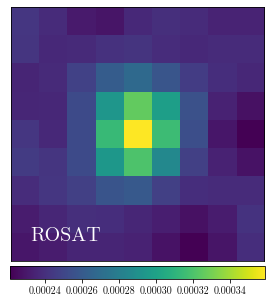

In [3]:
font_path = 'data/cmunrm.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(figsize=(5,5))
i = 0

f1 = ax.imshow(stacksros[i])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.colorbar(mappable = f1, ax = ax,orientation='horizontal',fraction=0.047, pad=0.02)
scalebar = AnchoredSizeBar(ax.transData,
                           4.4, '', 'center left', 
                           pad=0.,
                           sep=-7,
                           color='white',
                           frameon=False,
                           size_vertical=0.02)
# ax.add_artist(scalebar)
# ax.text(0.1, 0.4, 'R = 10$\,$\''.format(10), c='white', fontsize=18, transform=ax.transAxes)

# ax.text(0.2,.7,"N={}".format(lens[i]),color='white',fontsize=20)
ax.text(0.2,7.8,"ROSAT".format(lens[i]),color='white',fontsize=20)

i+=1

plt.savefig("output/stacksros.png")
plt.show()

## NEW Work ##

In [3]:
# Copied imports from above

import numpy as np
from astropy.coordinates import SkyCoord
from astropy.io import fits
import healpy as hp
import matplotlib.pyplot as plt
import time
import sys
from pixell import enmap, enplot, reproject, utils, curvedsky, wcsutils
from matplotlib import cm
from scipy.optimize import curve_fit
from scipy.linalg import sqrtm
from tqdm import tqdm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import pandas as pd
from matplotlib import font_manager

In [4]:

# Task 2 - Map of sky in a certain area

# TO get void locations
# awd = pd.read_csv("data/voids.csv", skiprows = 0).rename(columns = {"ras":"amf_ra", "decs":"amf_dec"})

# TO get ALL cluster locations (union3)
awd = pd.read_csv("data/union3.csv", skiprows = 0)

## ACT ##

In [ ]:
# For 90 GHz frequency sample

actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f090_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

## Planck ##

In [9]:
# For the 100 GHz frequency sample

pl = hp.read_map("data/HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits")
windowlen = 10
pl[pl<-1e23]=0

# Create a full sky Cartesian geometry with resolution 5 arcmin / pixel
# Returns a shape and a world coordinate system?
shape, wcs = enmap.fullsky_geometry(res = 5.0*utils.arcmin, proj = "car")
map_pix = reproject.enmap_from_healpix(pl, shape = shape, wcs = wcs)

Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting


## Plotting

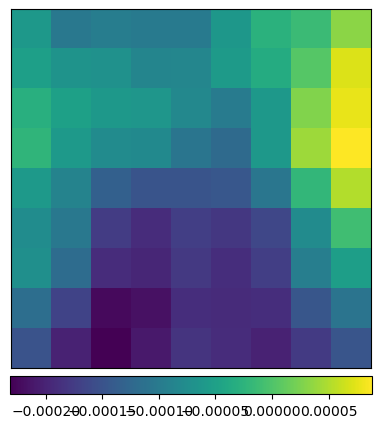

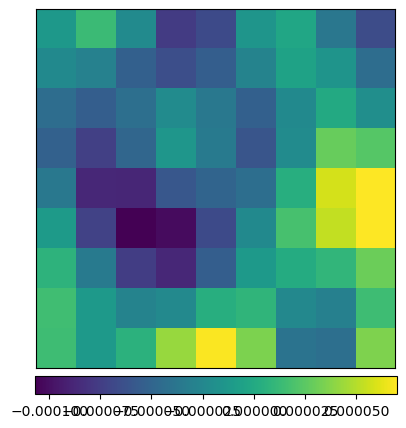

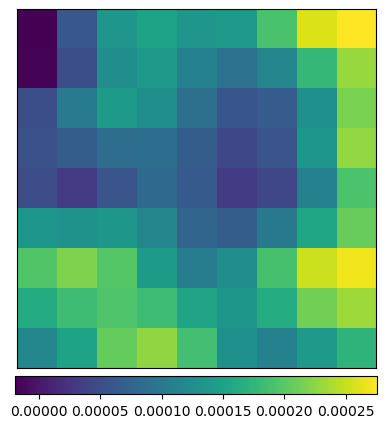

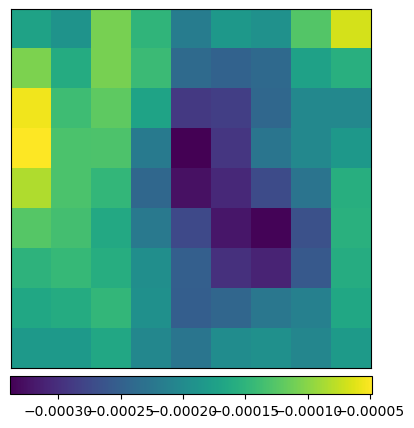

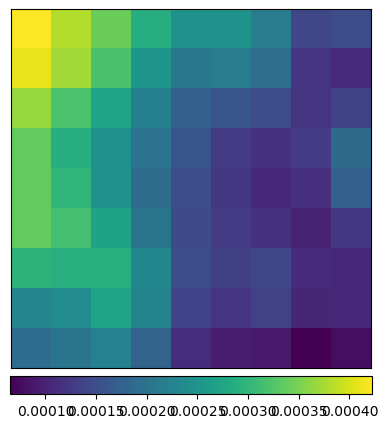

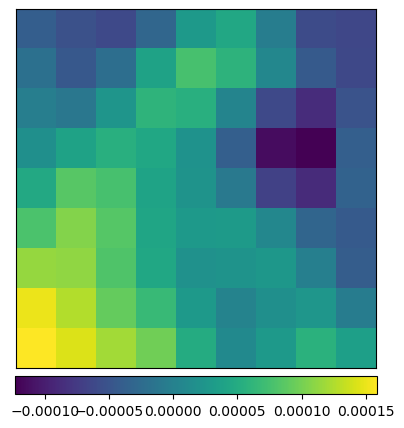

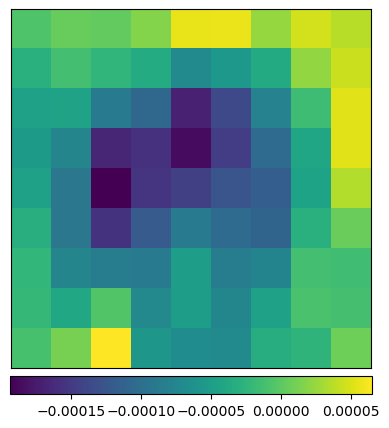

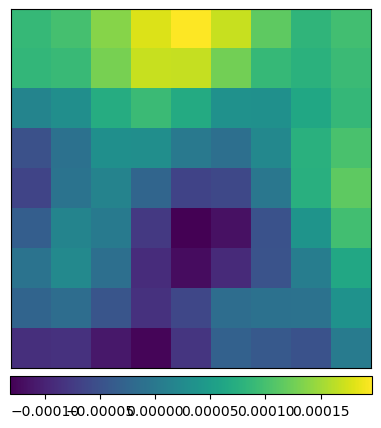

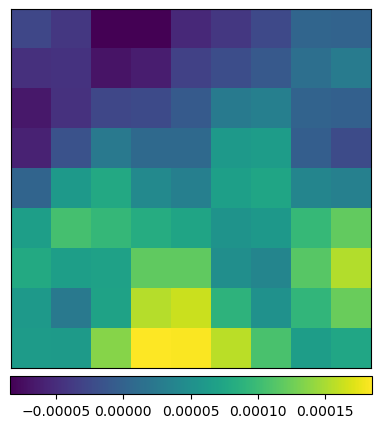

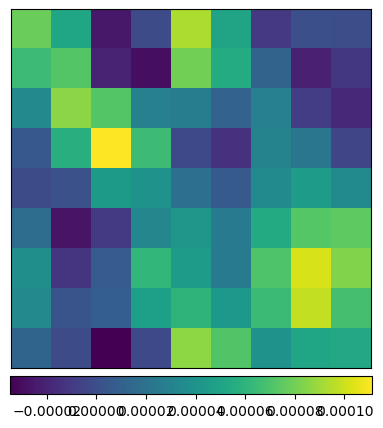

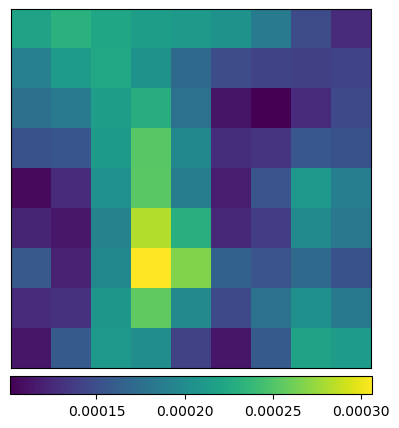

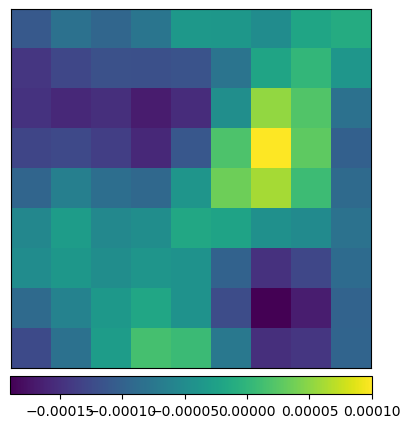

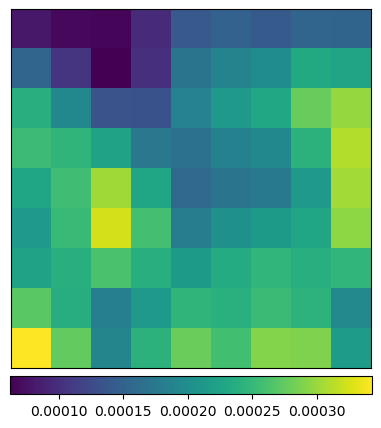

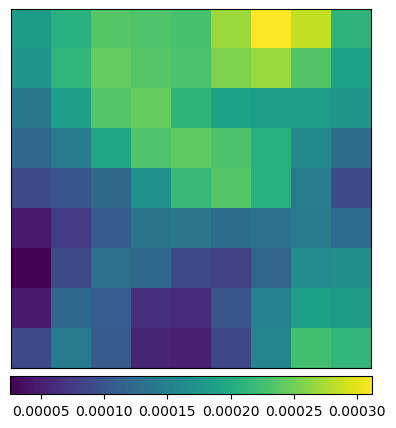

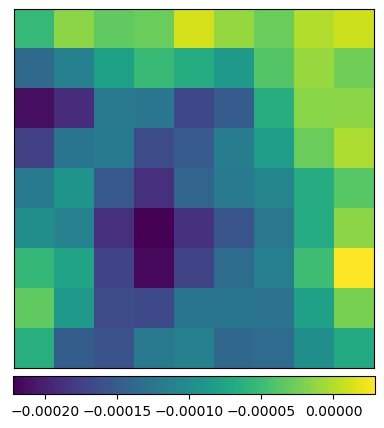

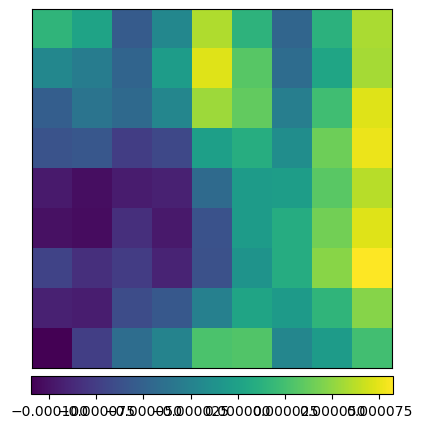

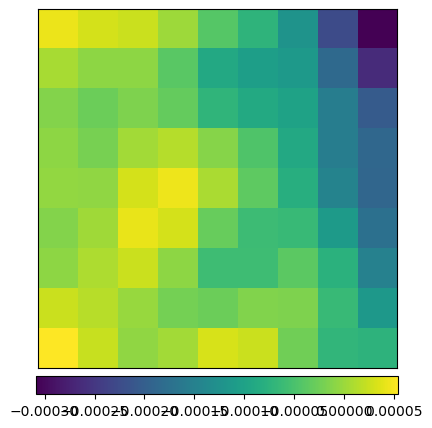

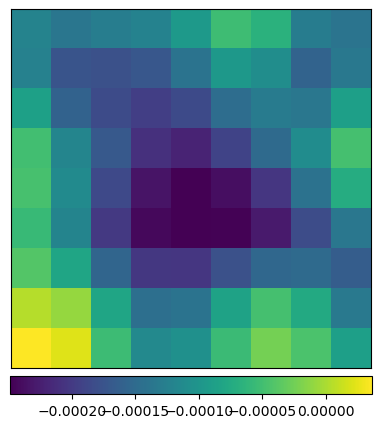

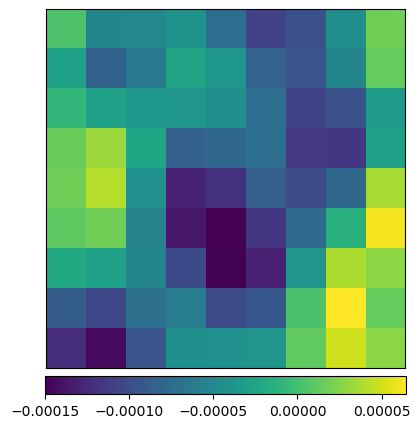

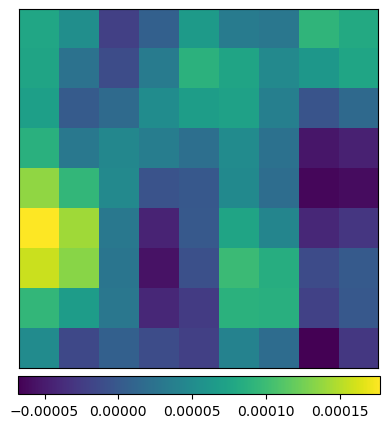

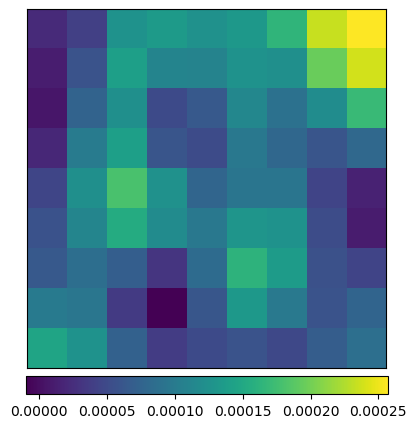

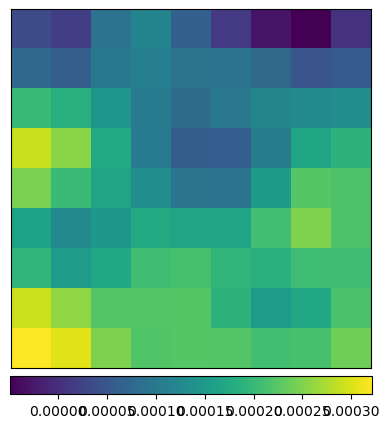

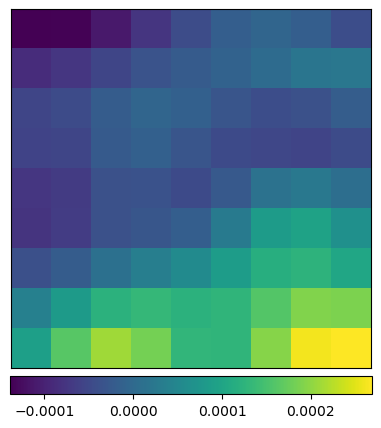

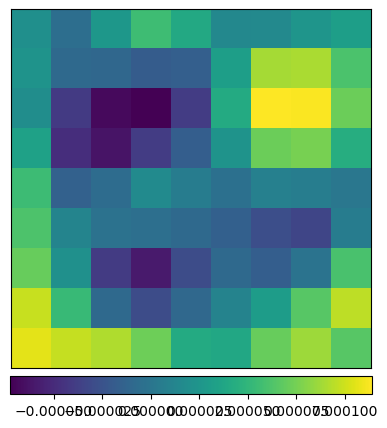

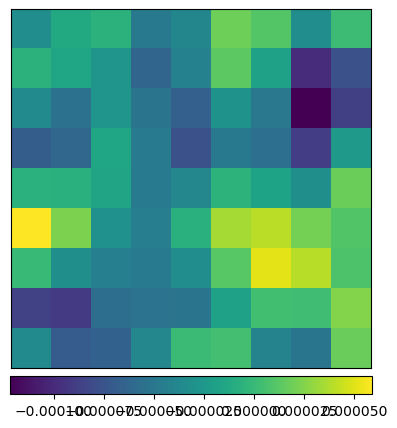

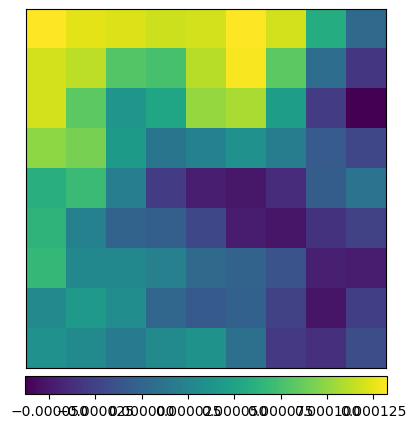

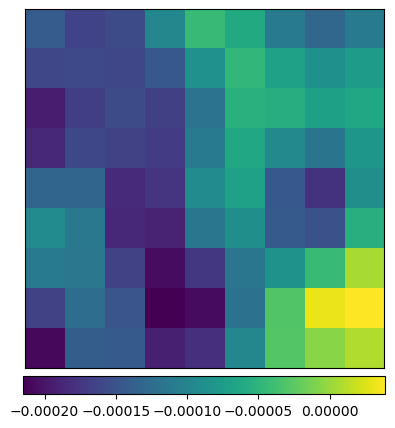

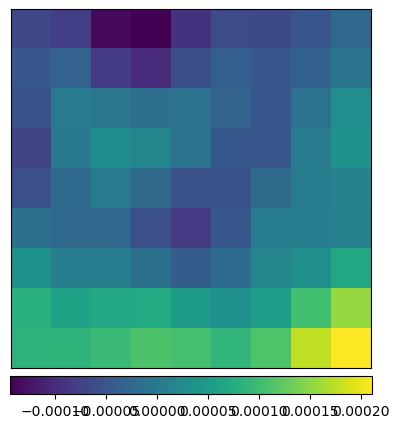

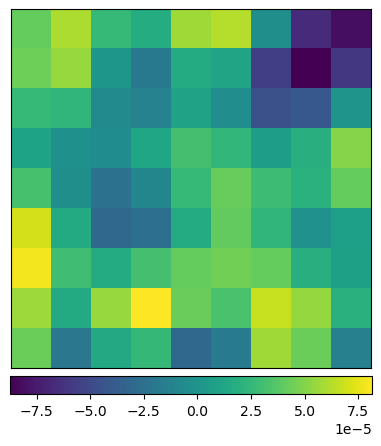

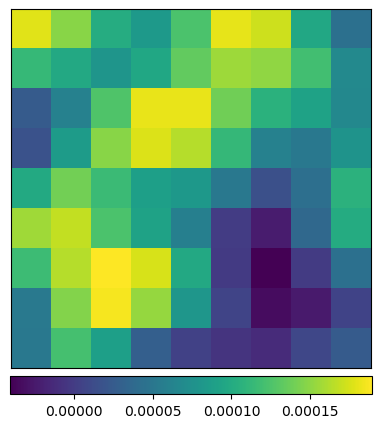

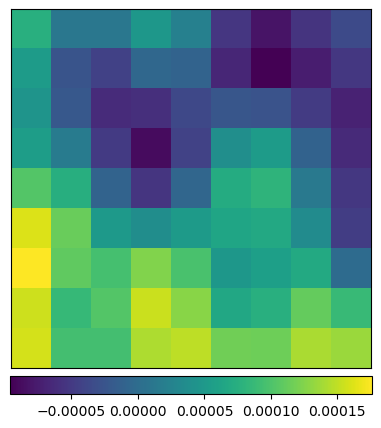

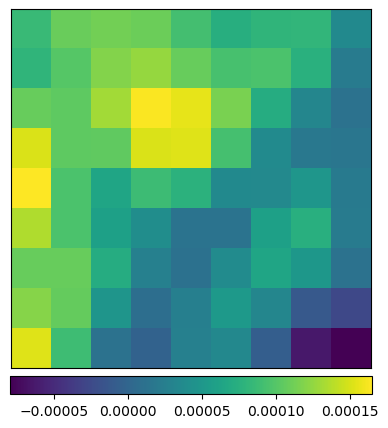

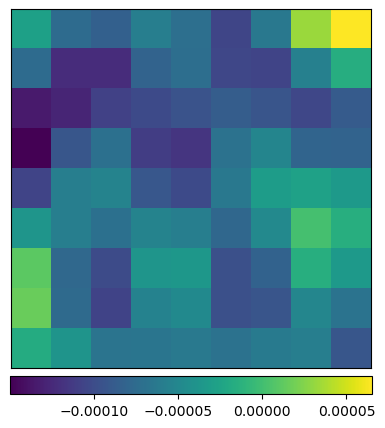

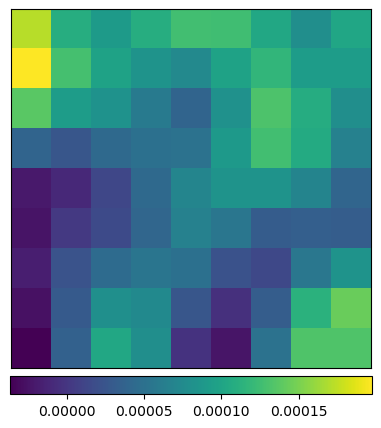

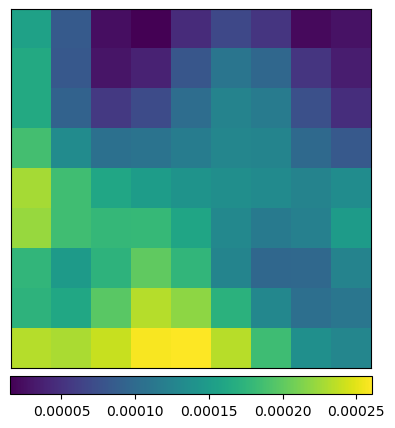

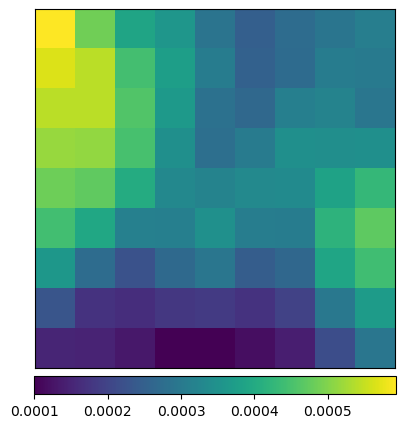

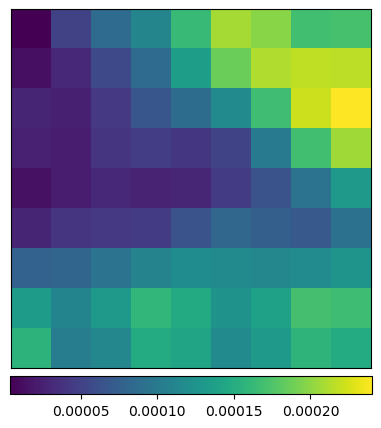

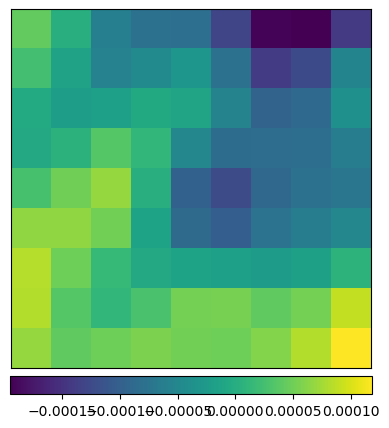

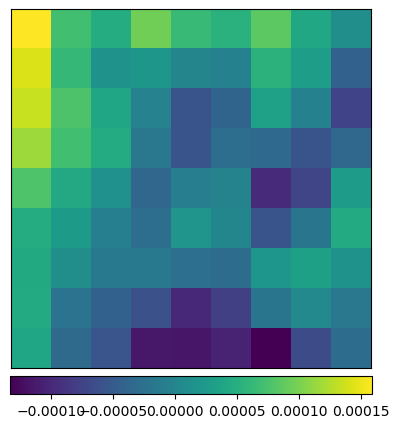

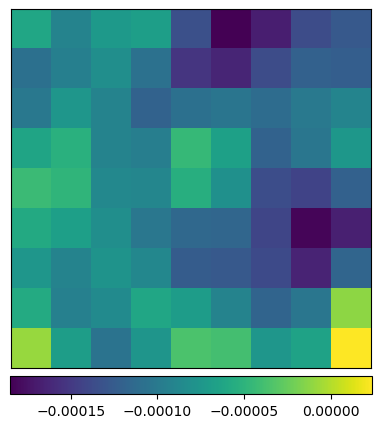

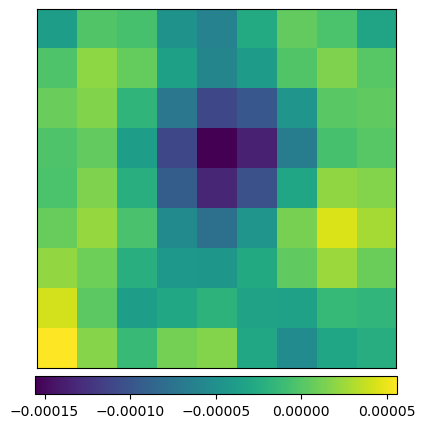

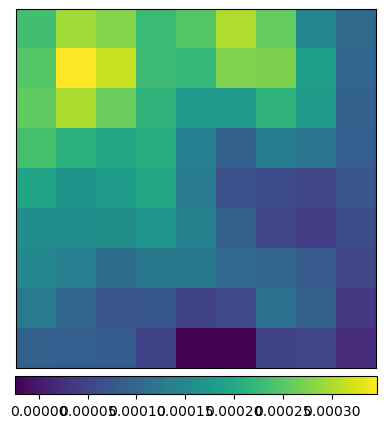

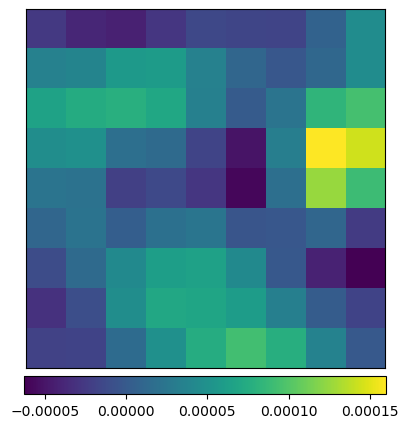

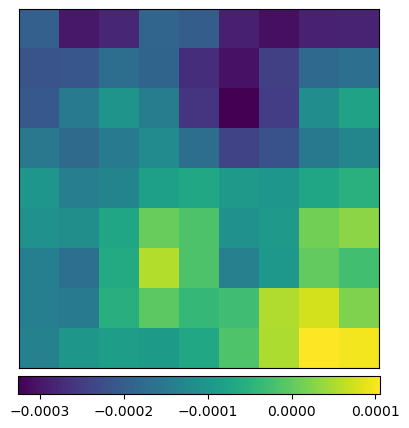

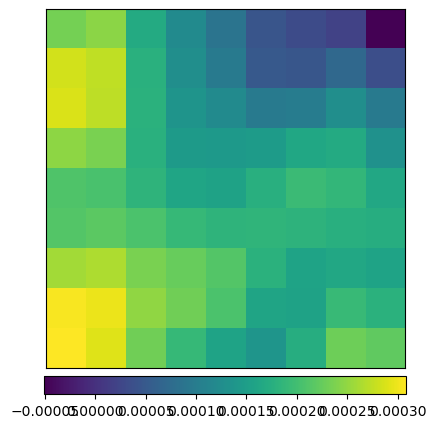

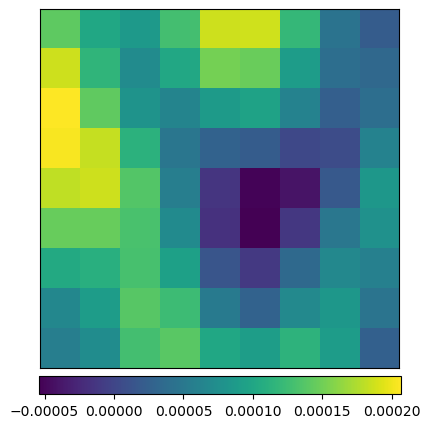

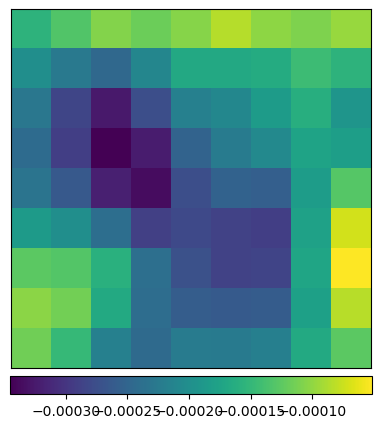

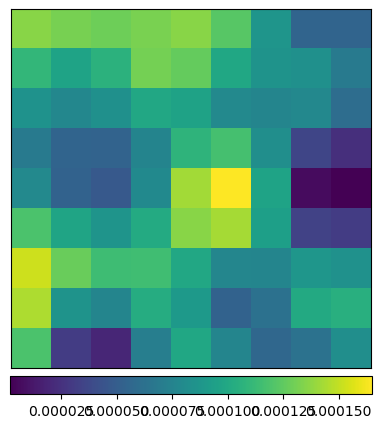

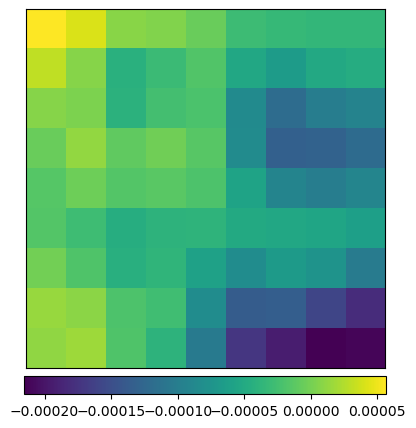

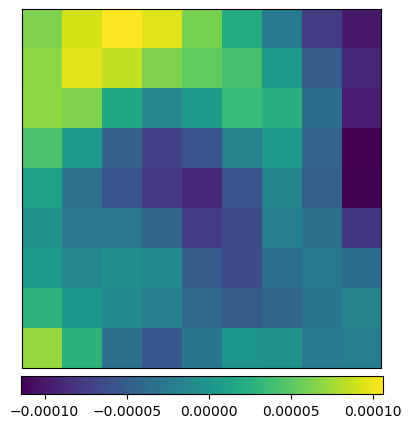

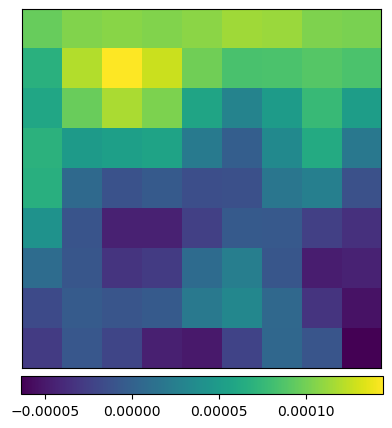

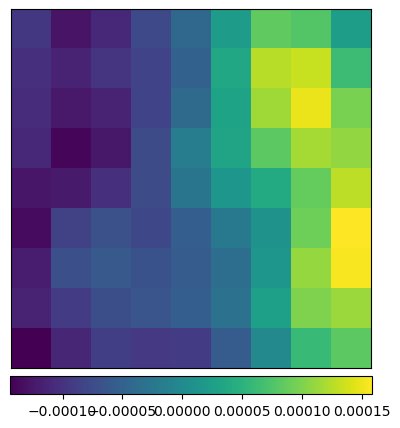

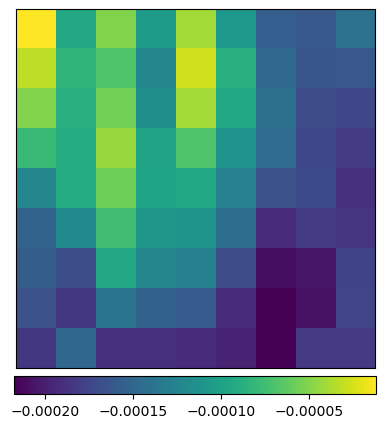

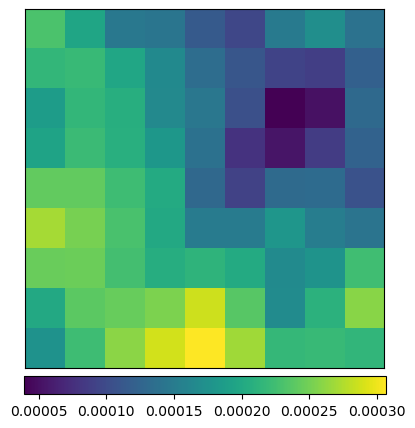

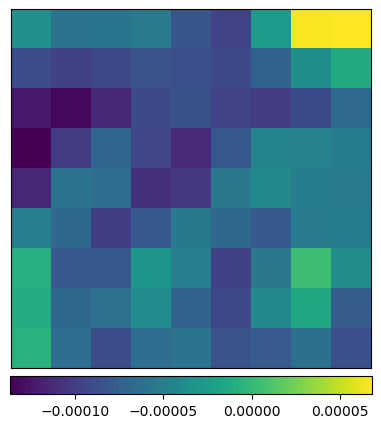

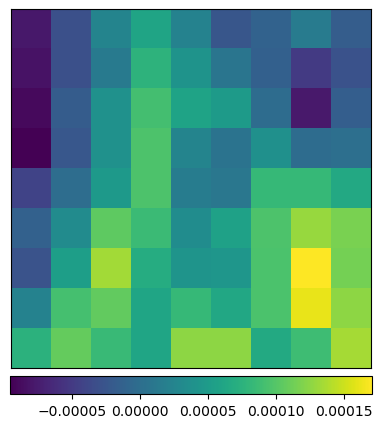

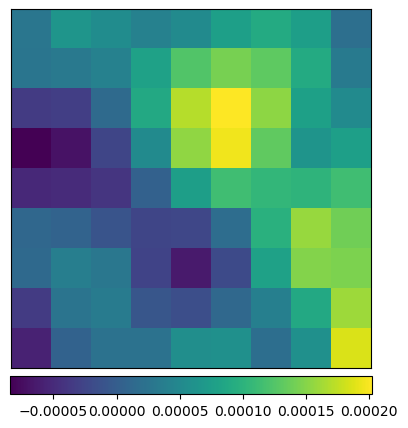

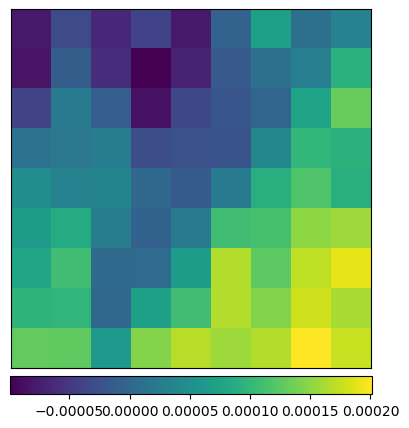

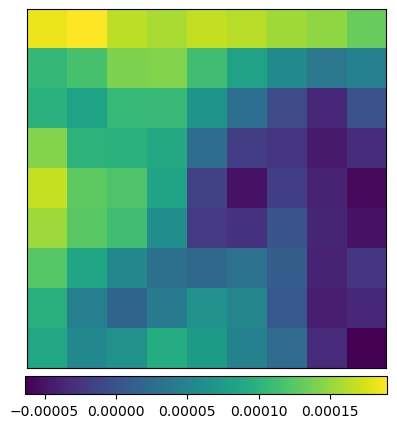

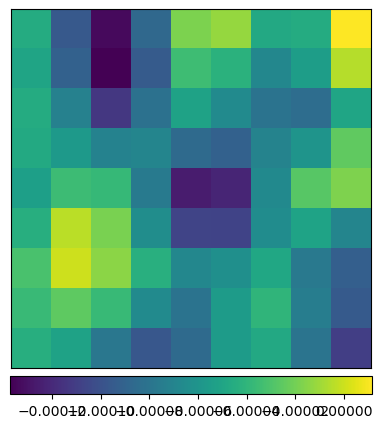

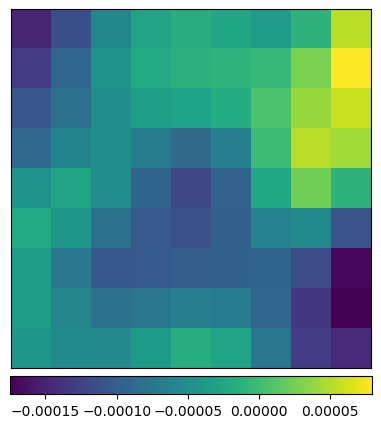

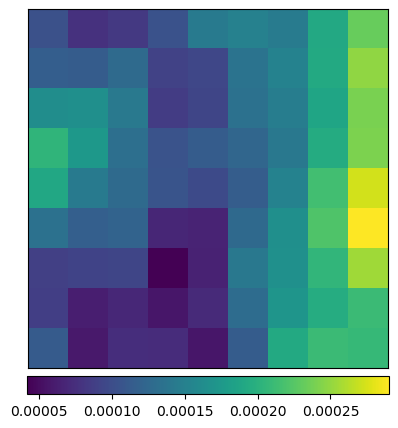

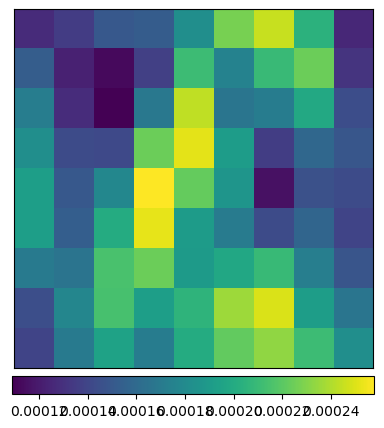

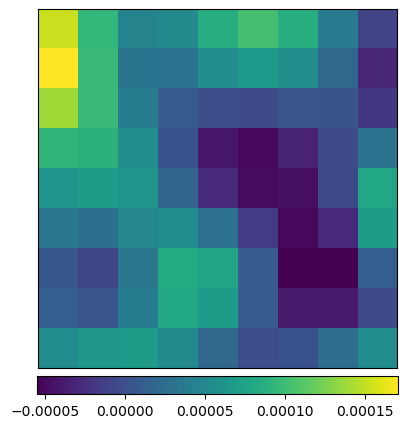

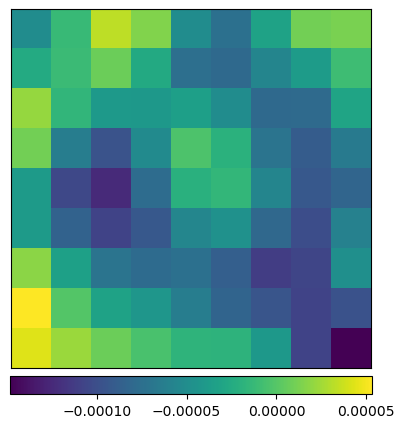

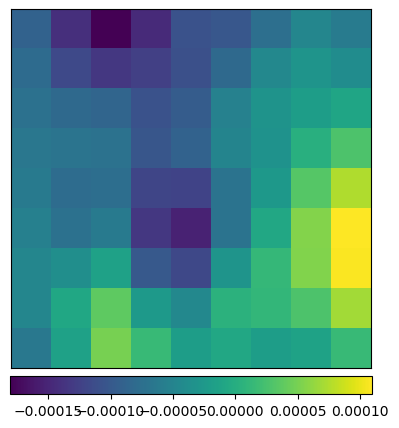

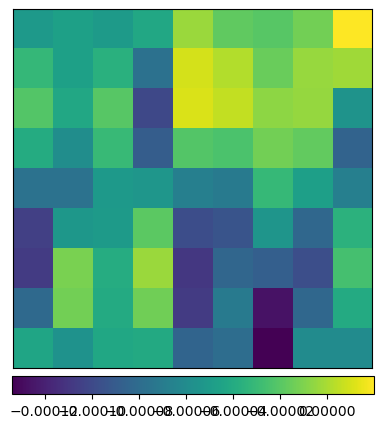

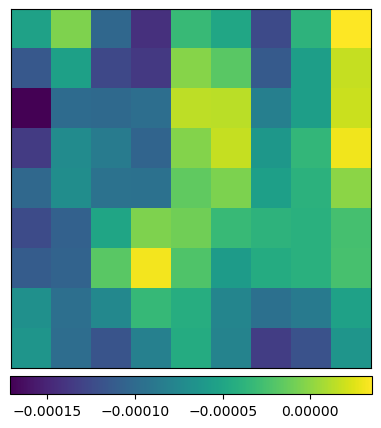

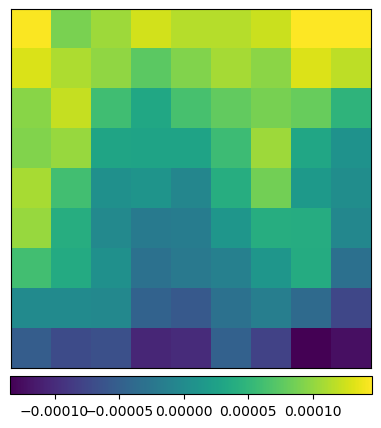

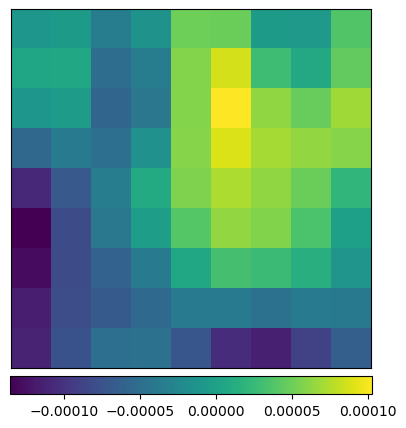

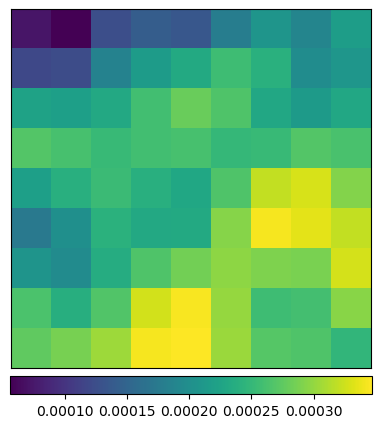

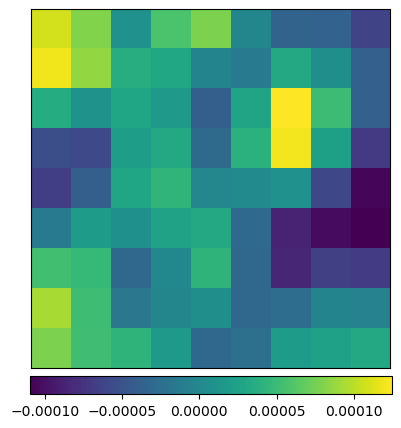

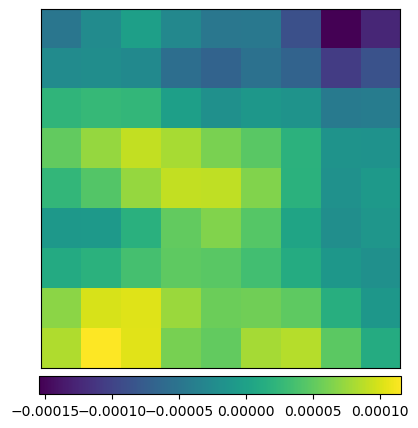

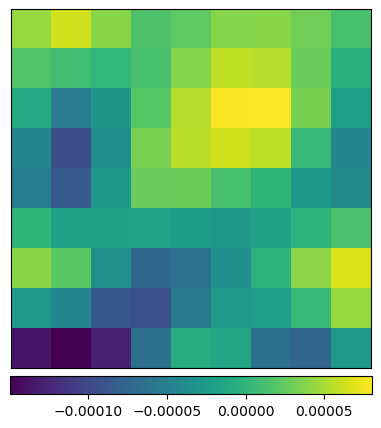

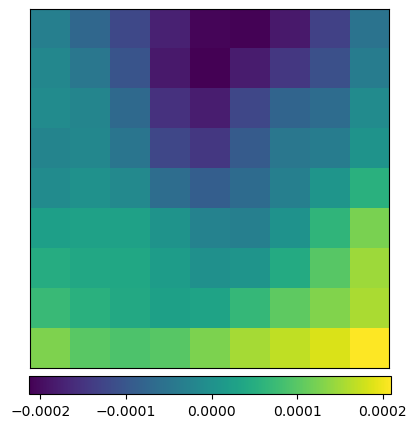

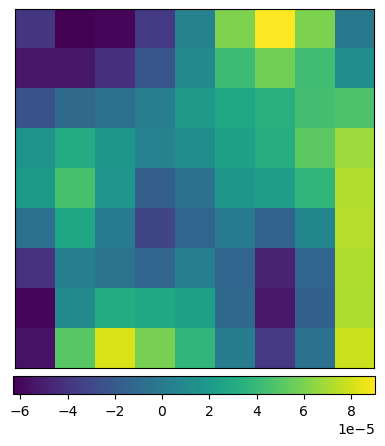

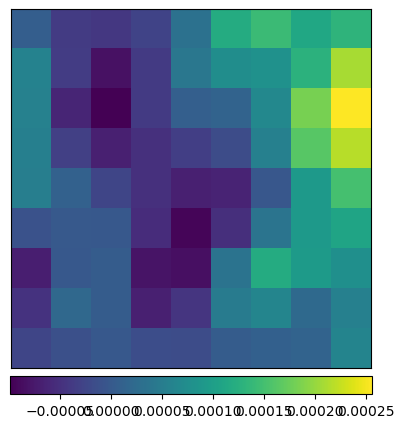

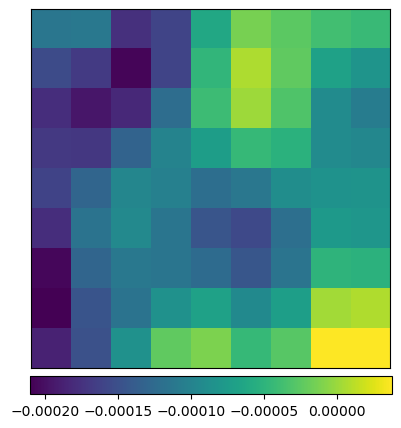

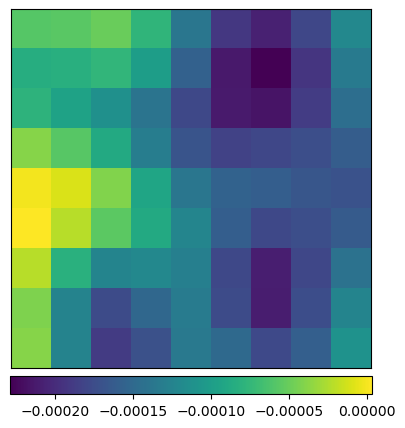

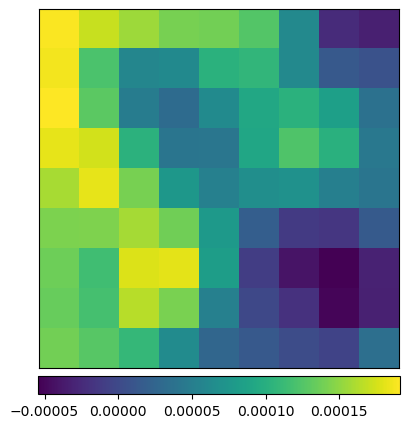

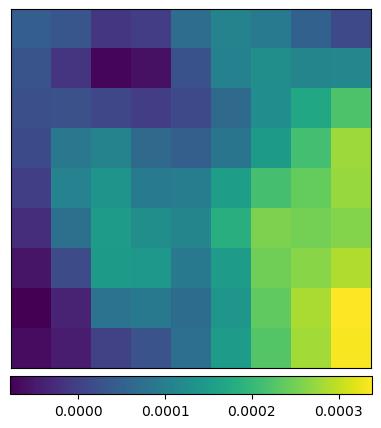

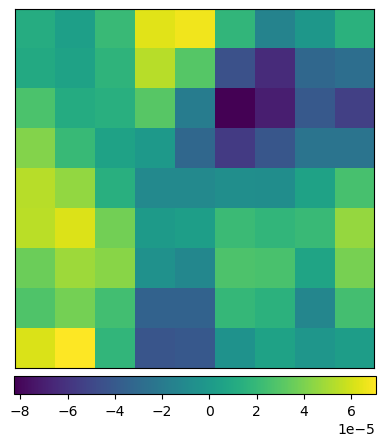

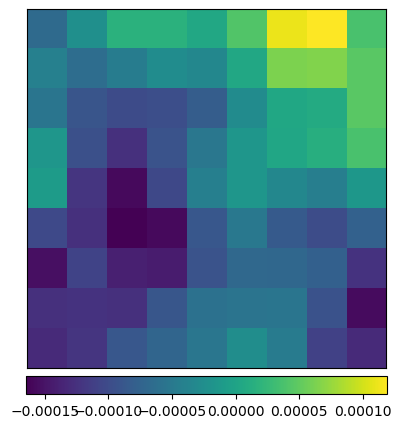

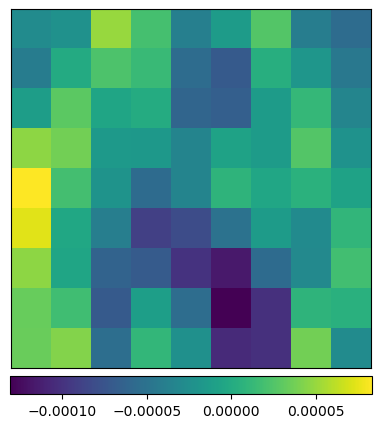

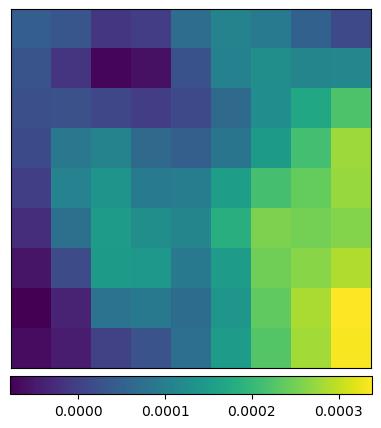

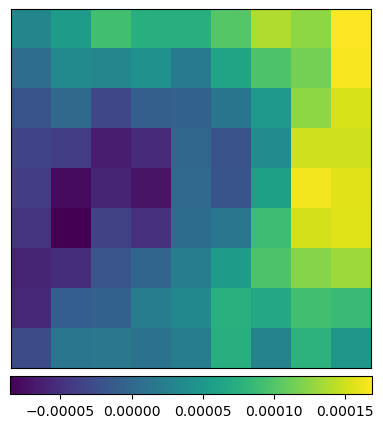

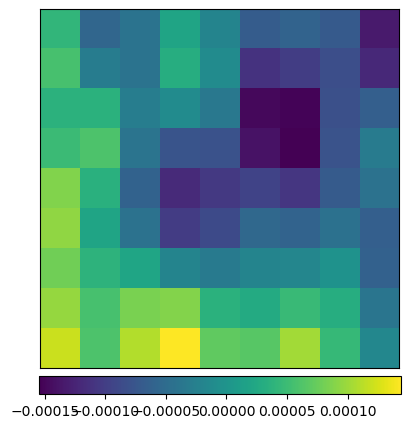

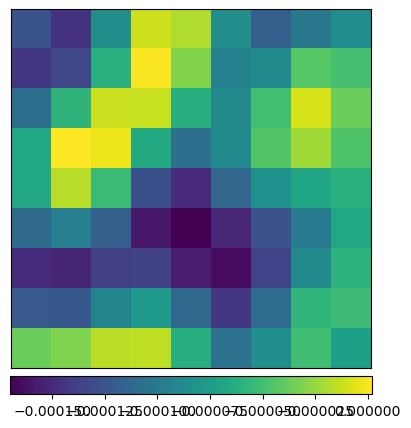

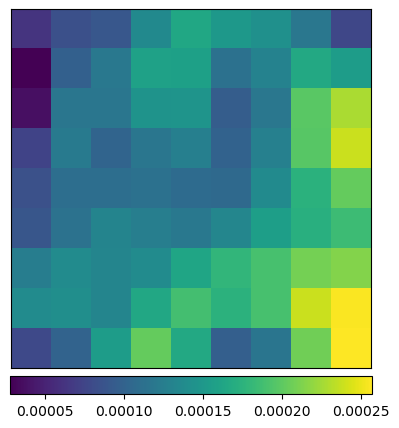

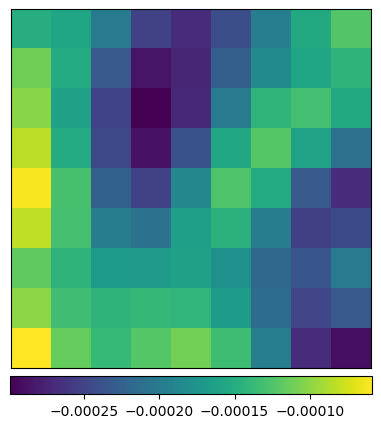

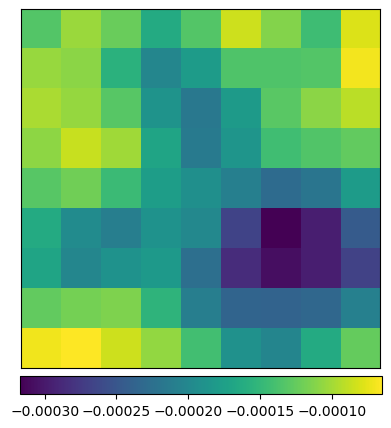

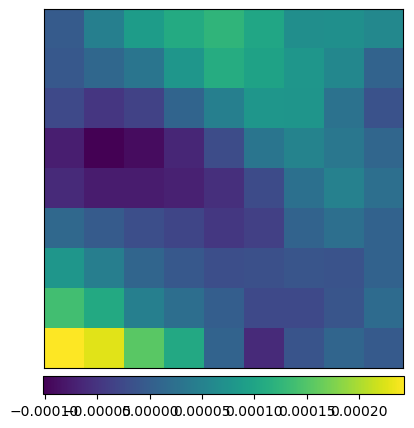

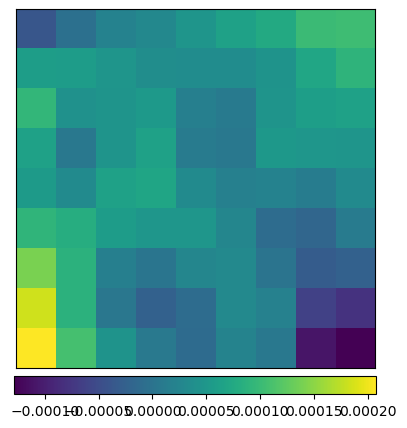

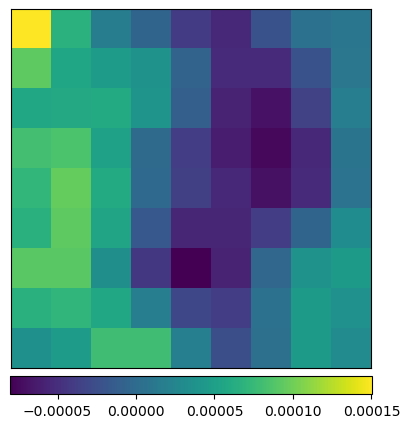

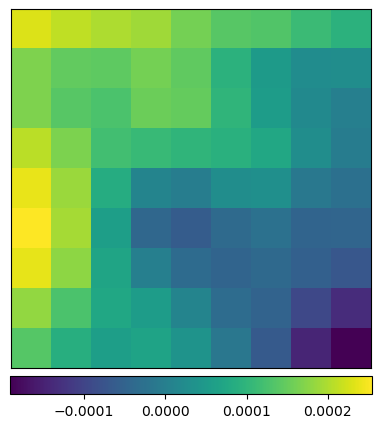

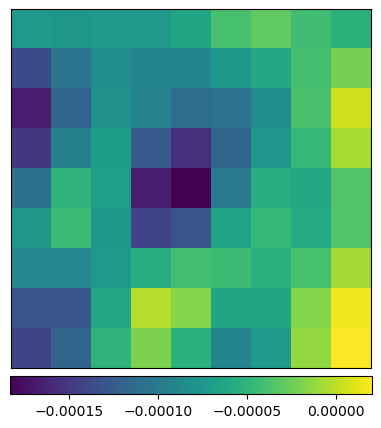

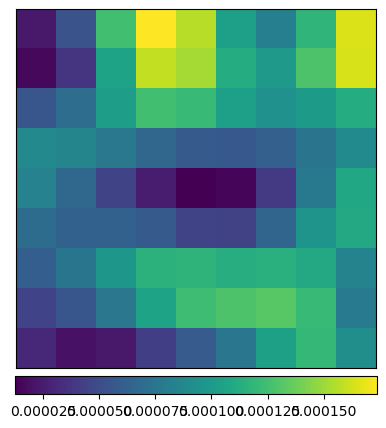

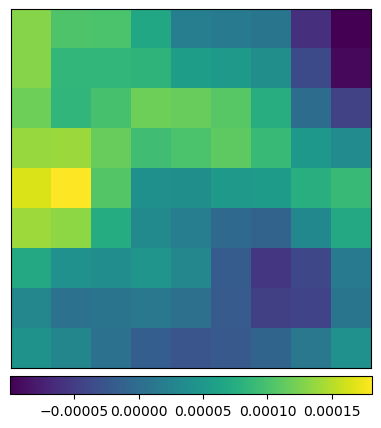

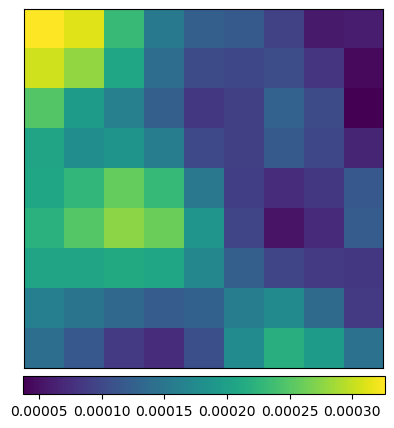

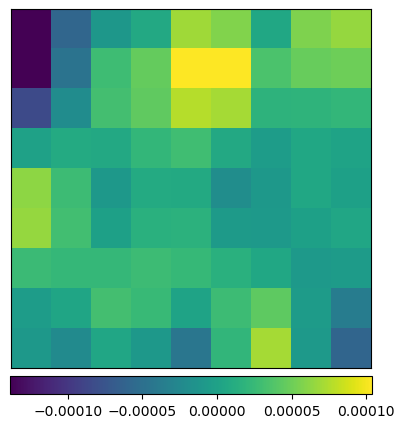

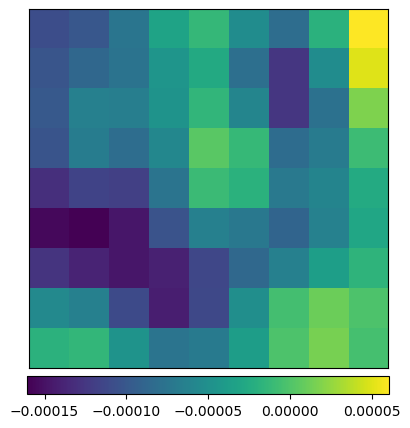

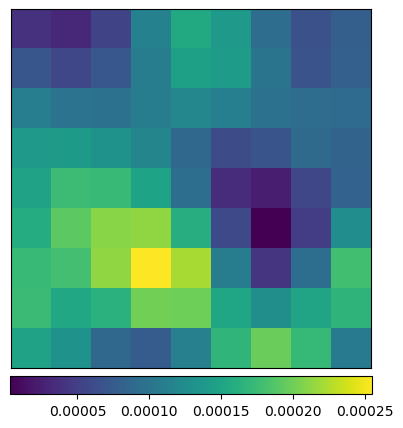

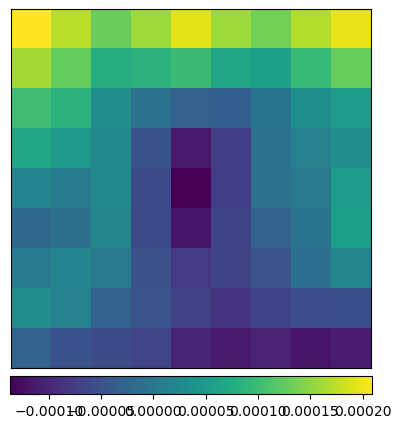

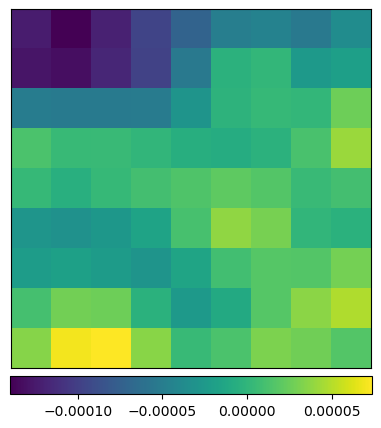

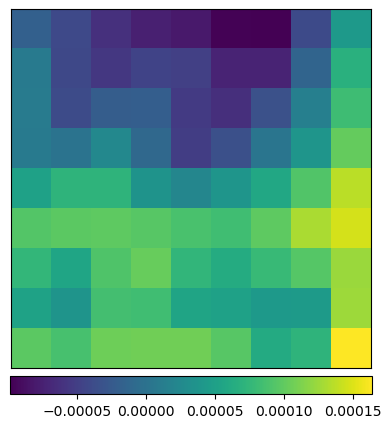

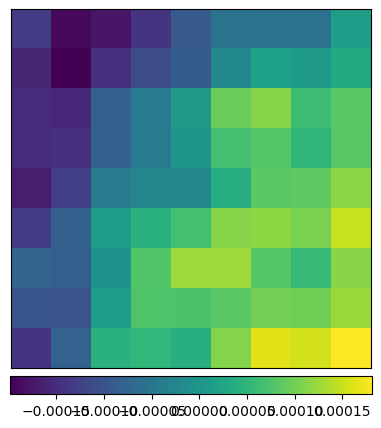

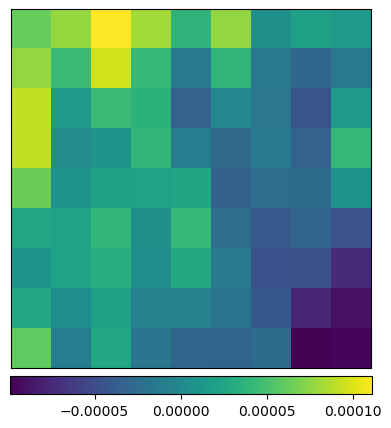

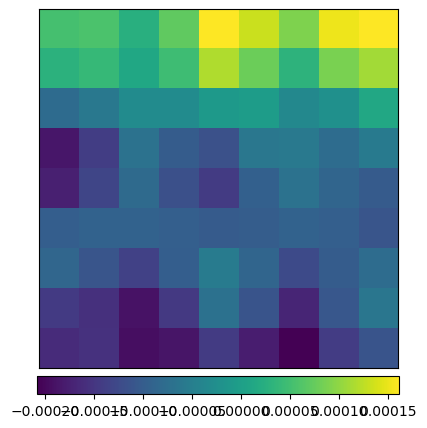

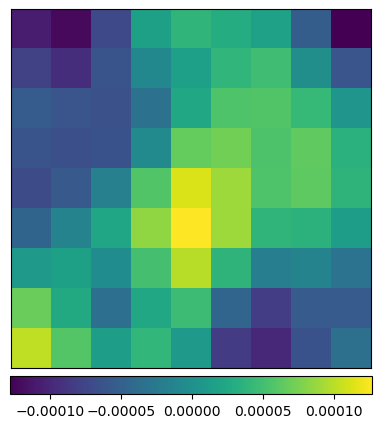

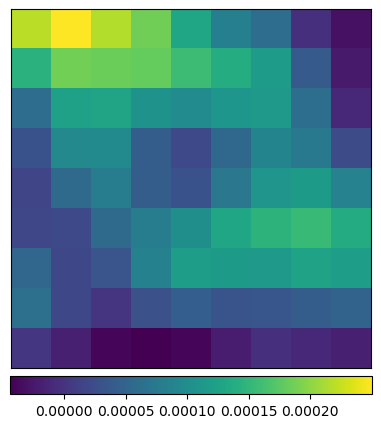

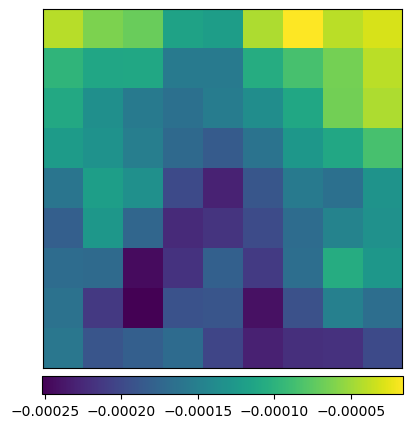

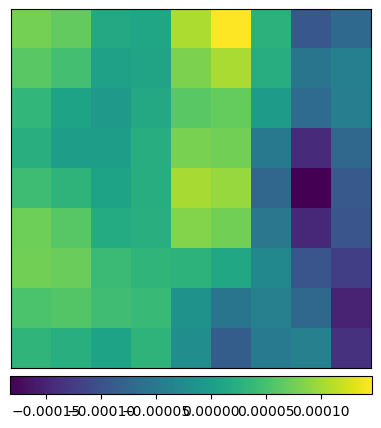

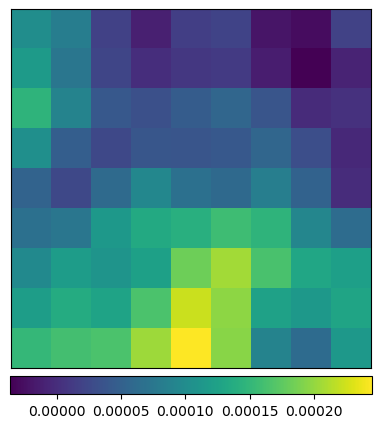

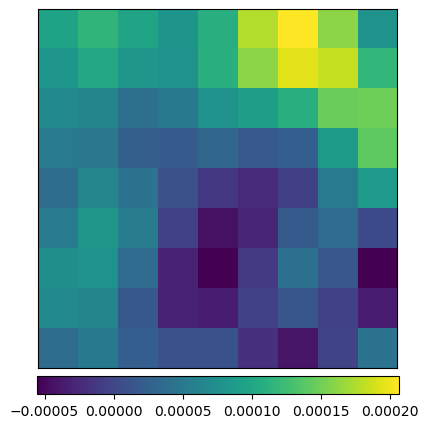

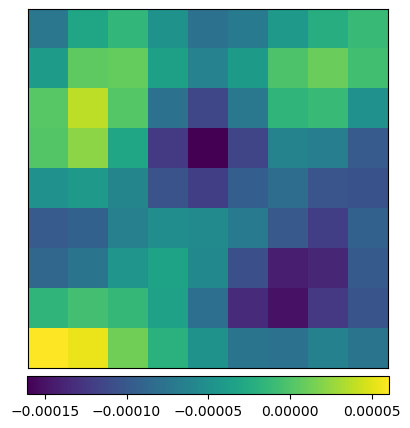

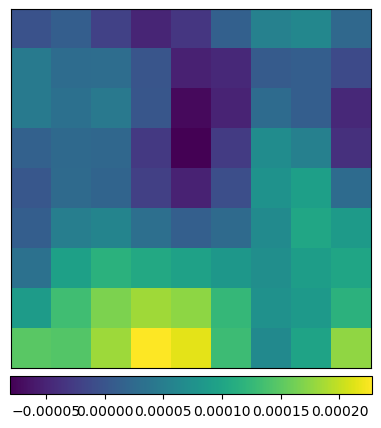

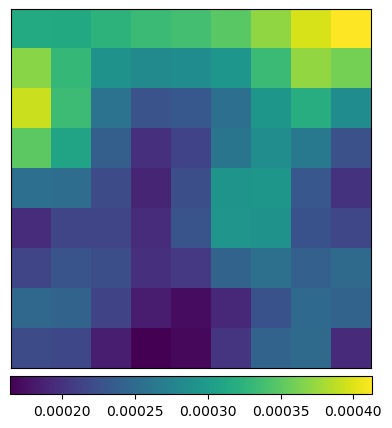

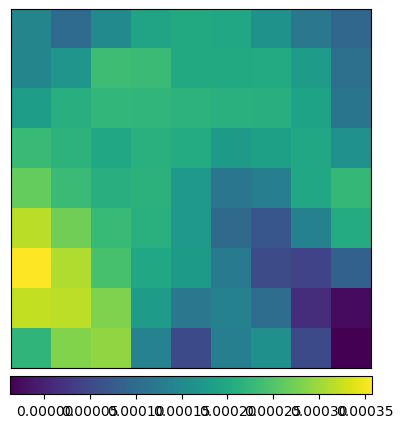

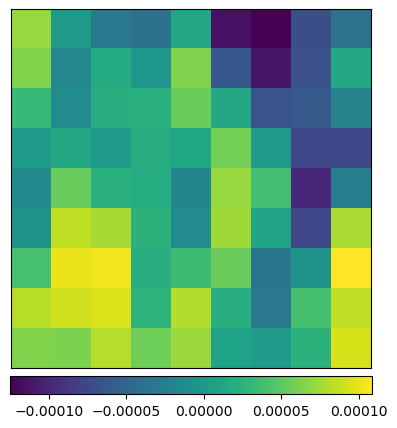

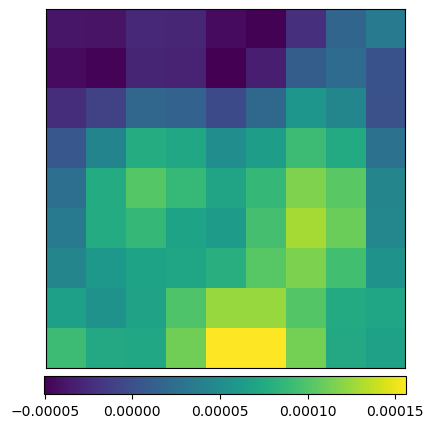

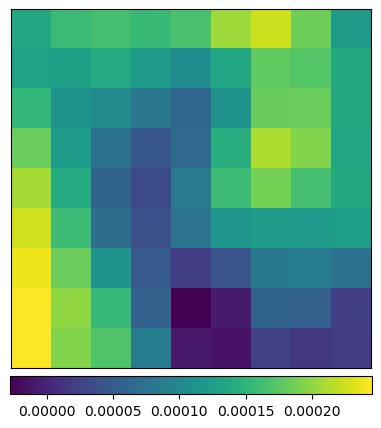

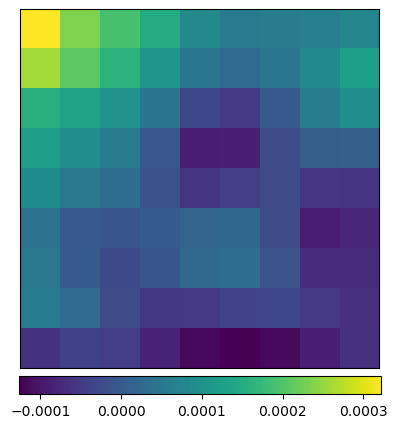

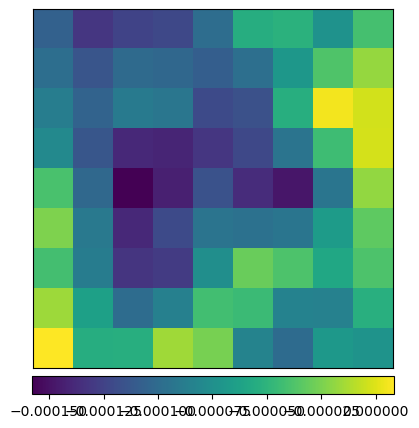

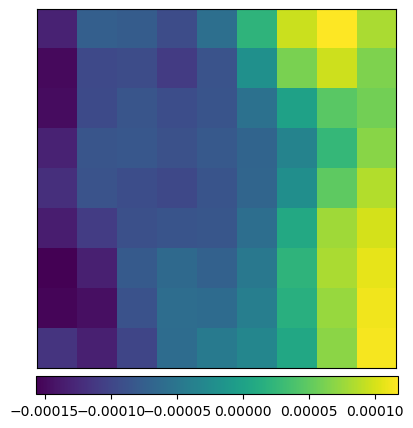

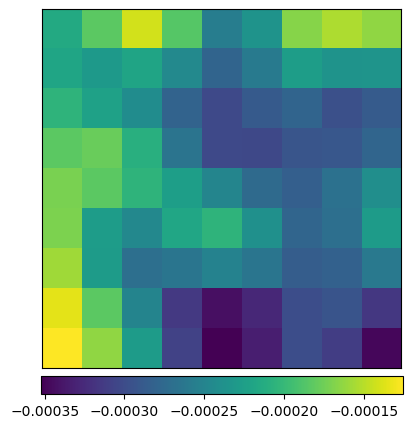

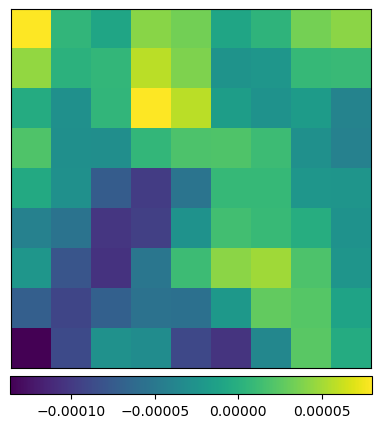

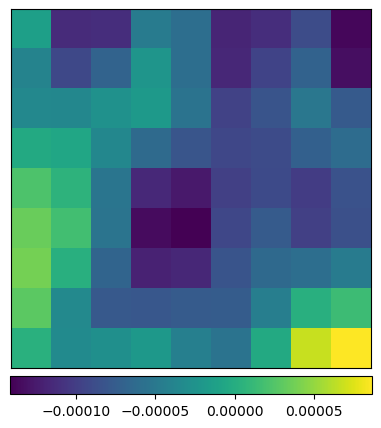

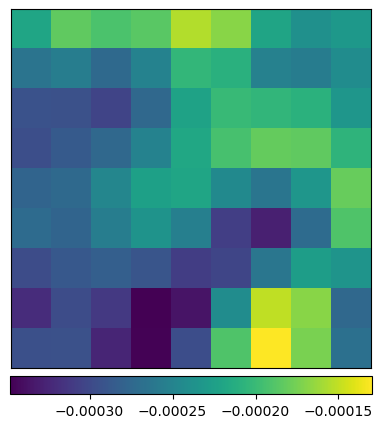

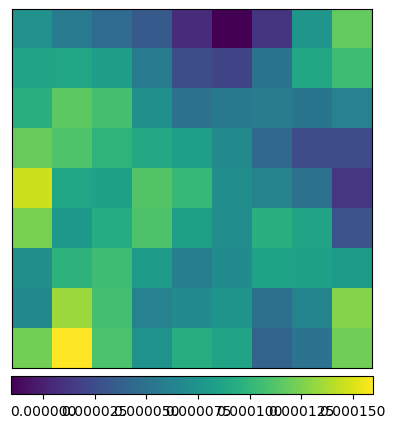

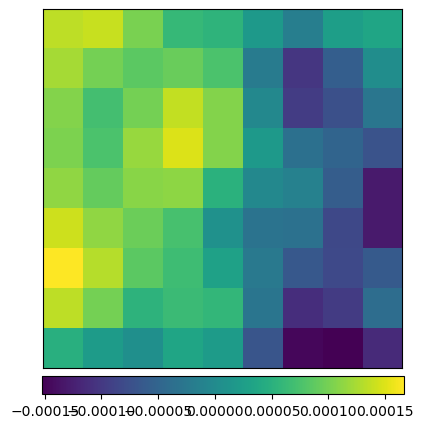

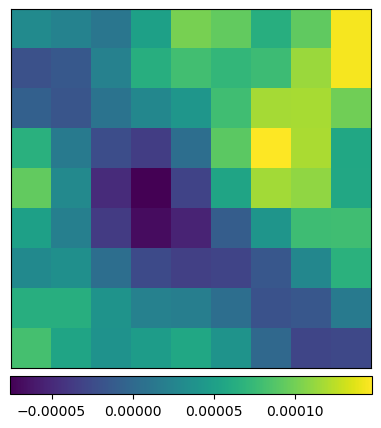

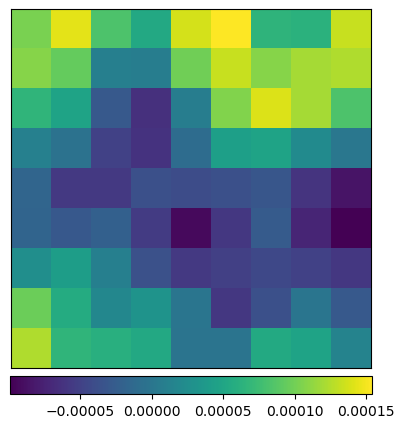

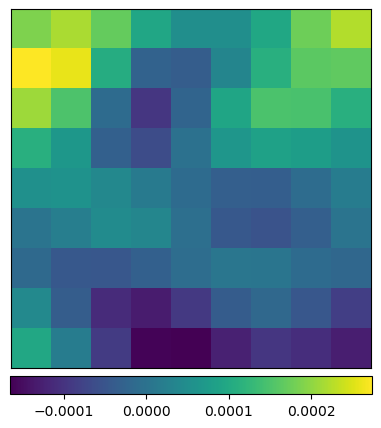

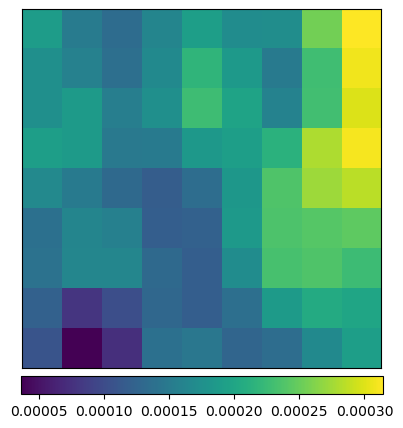

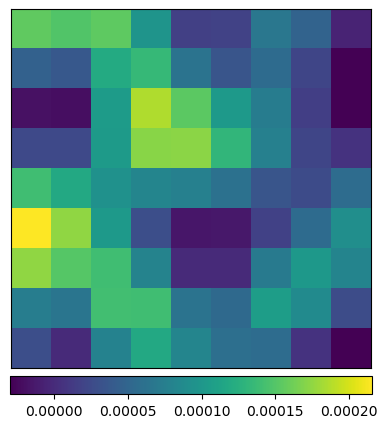

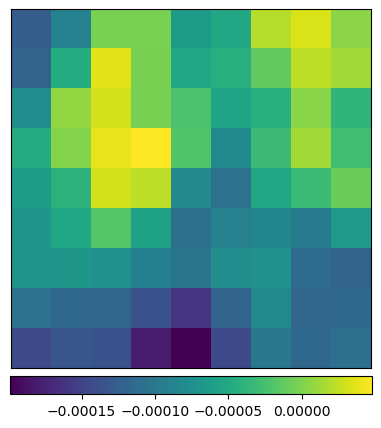

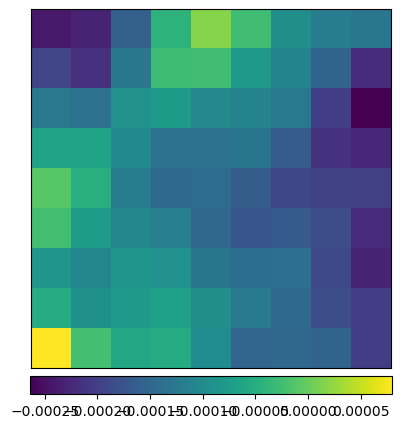

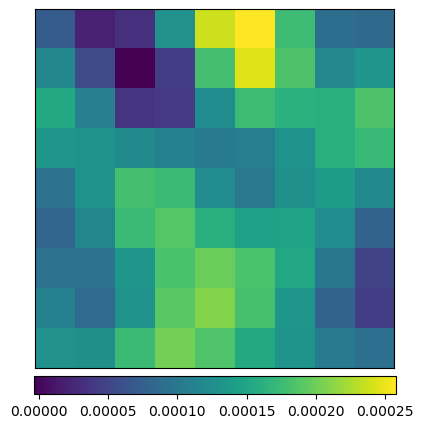

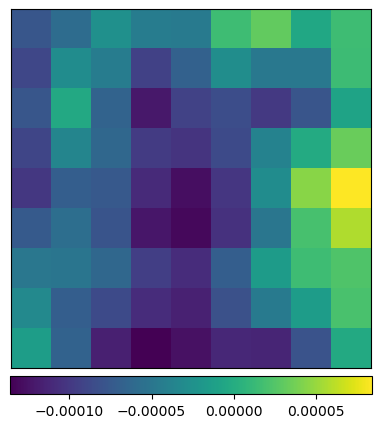

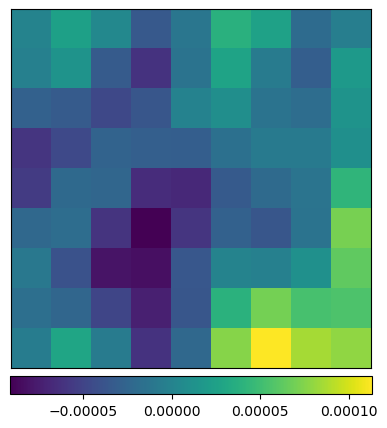

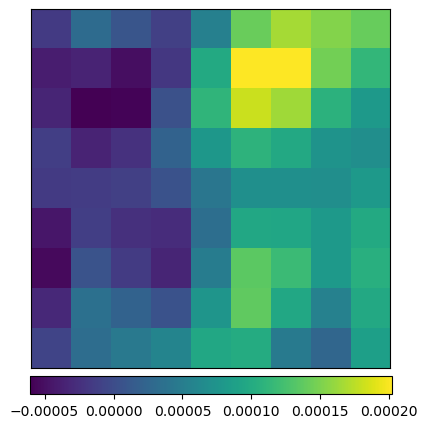

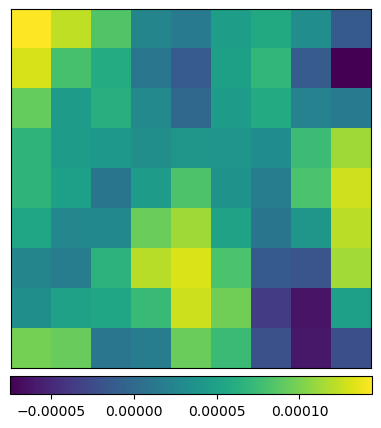

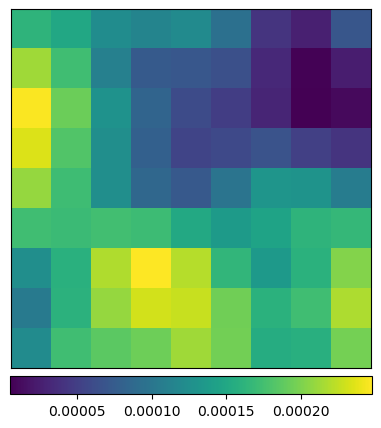

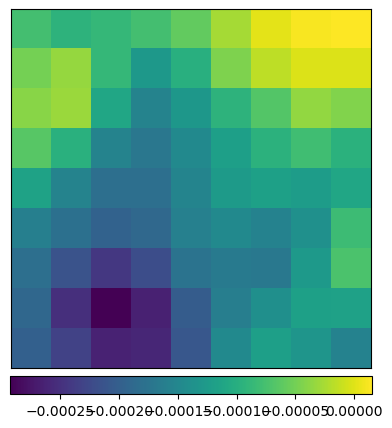

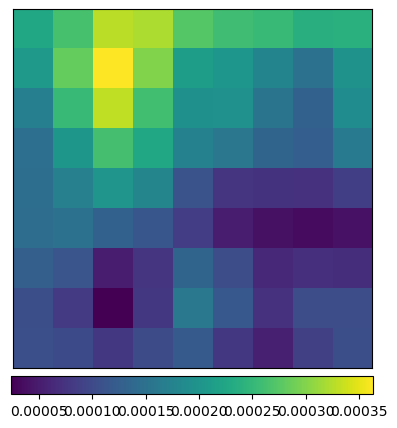

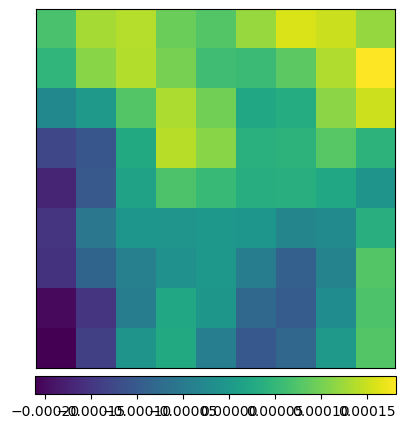

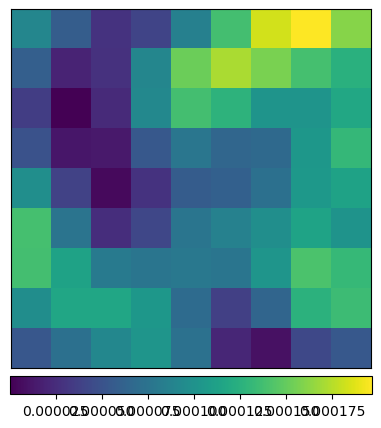

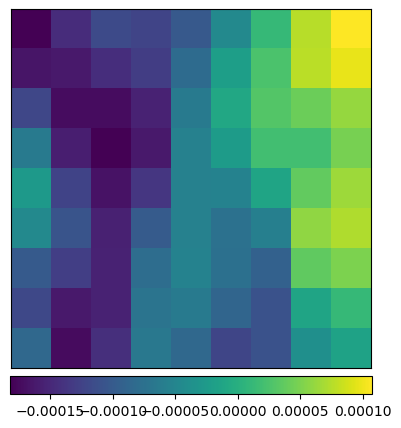

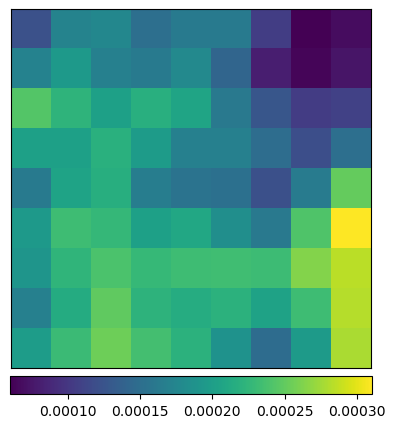

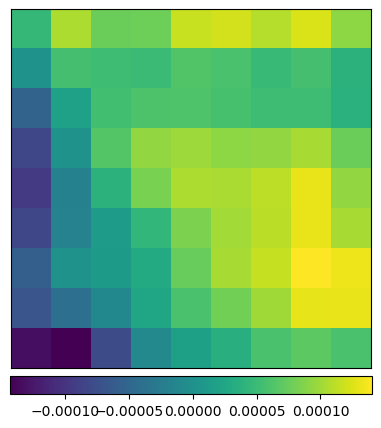

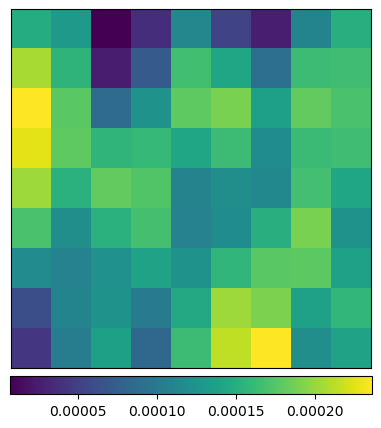

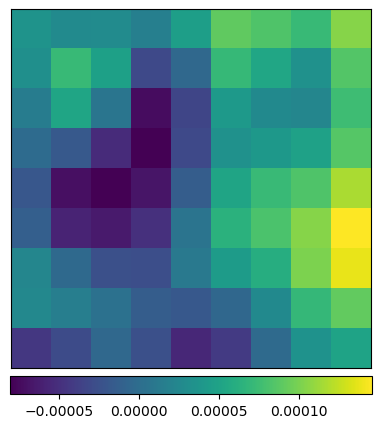

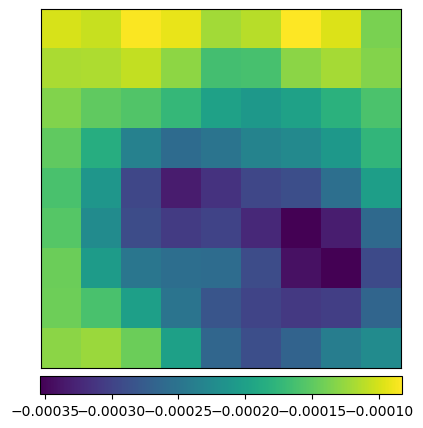

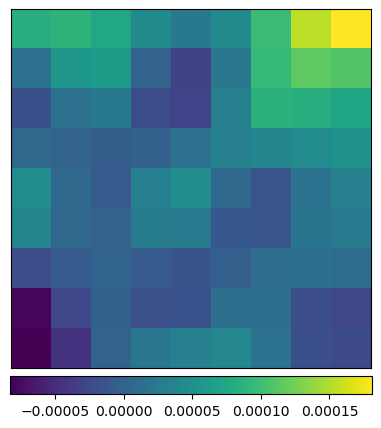

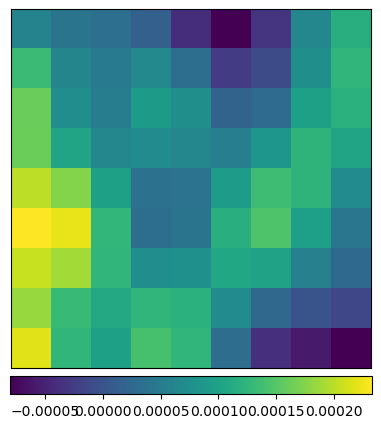

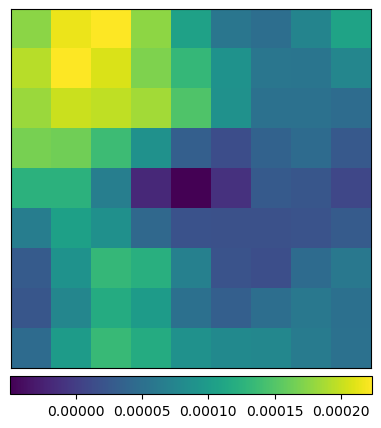

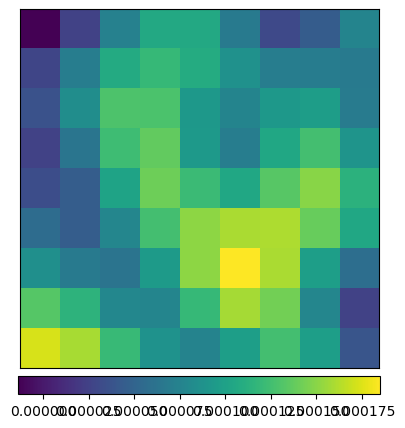

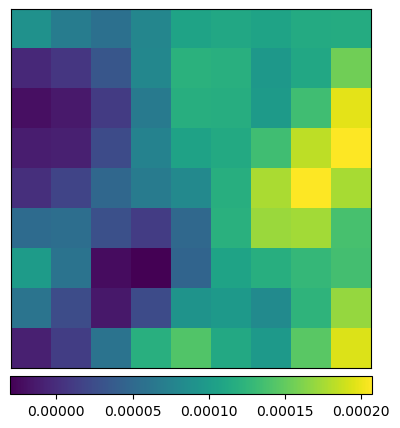

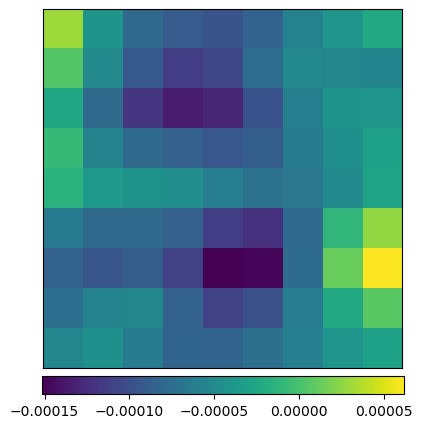

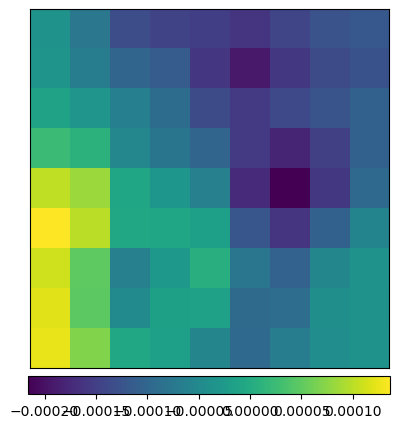

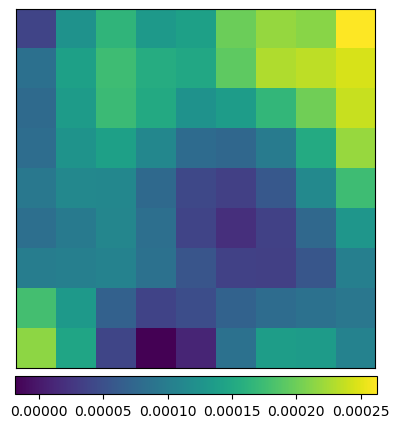

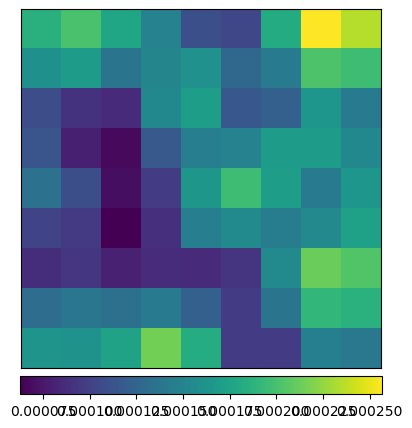

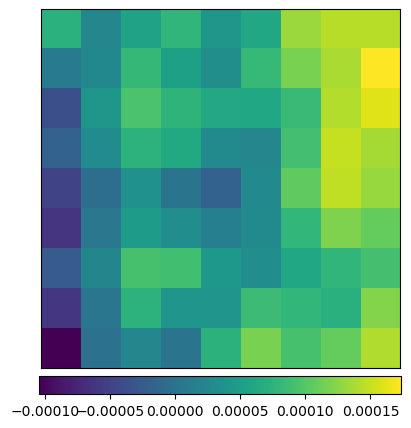

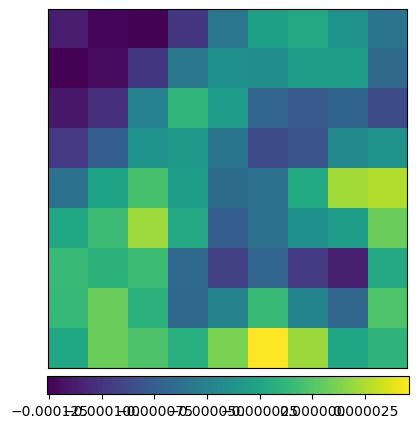

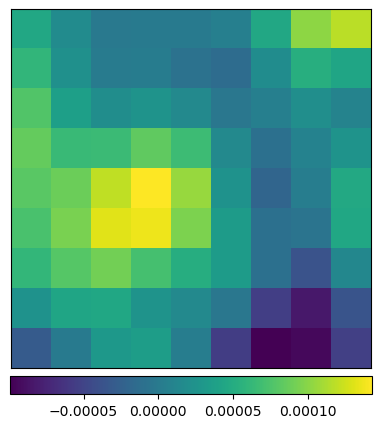

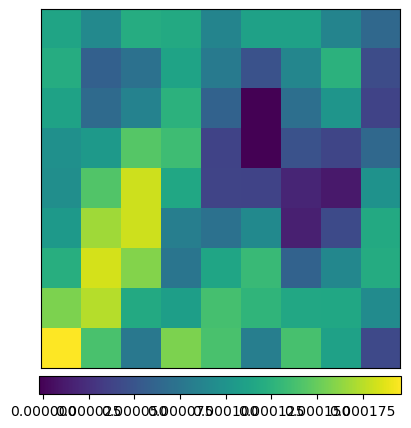

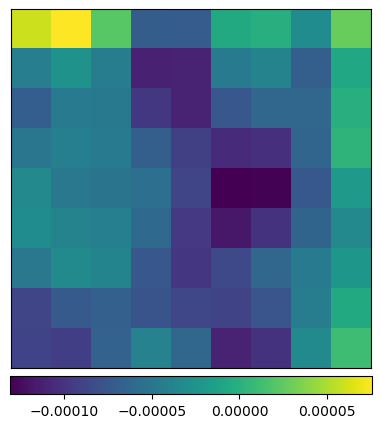

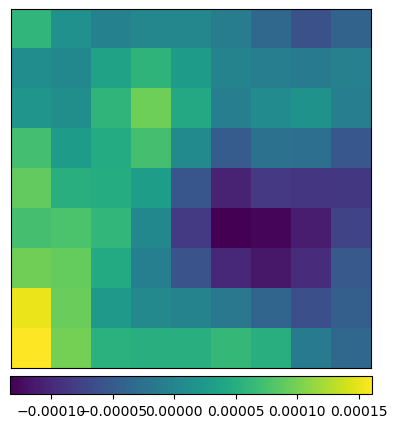

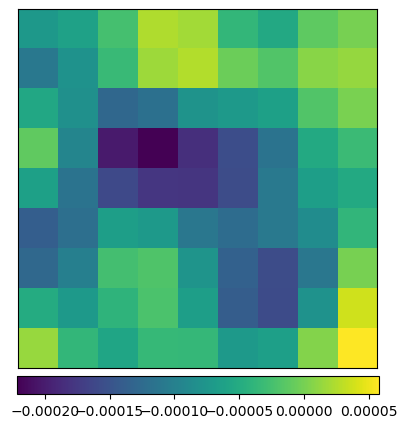

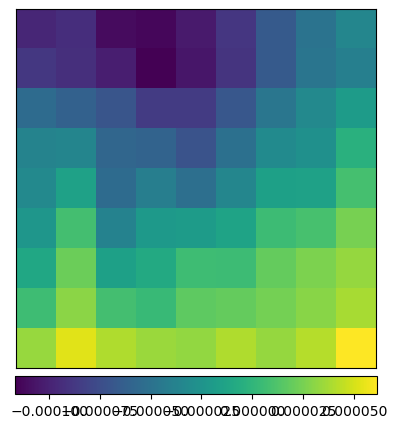

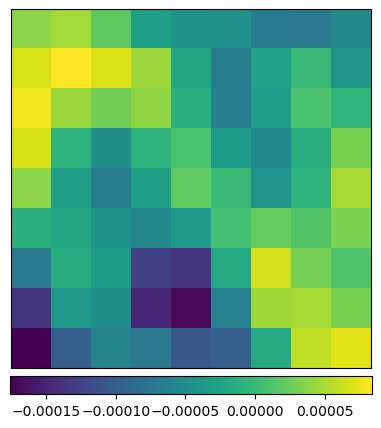

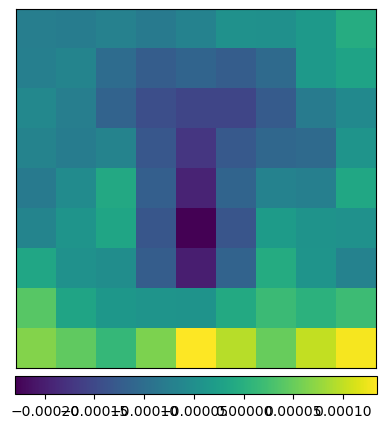

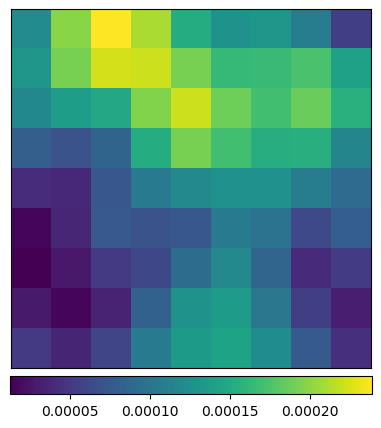

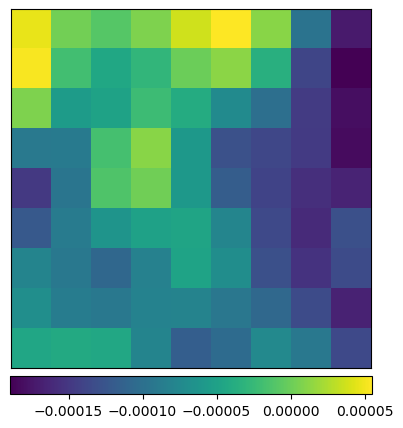

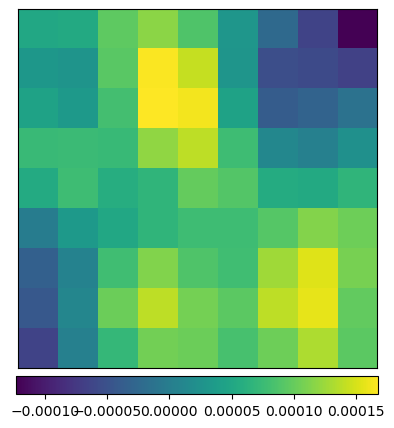

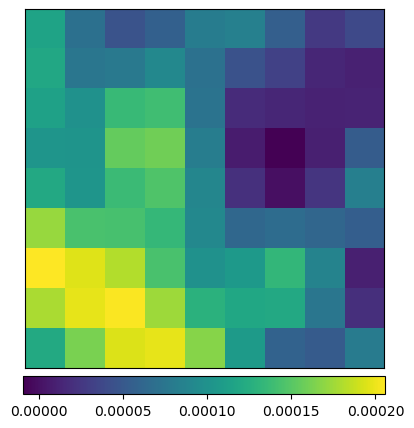

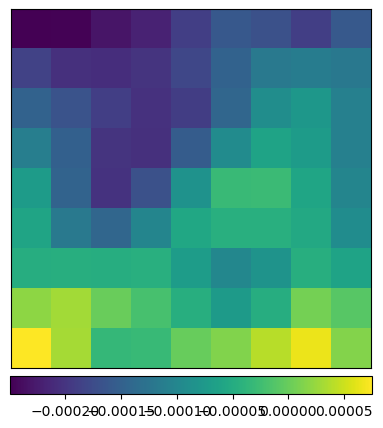

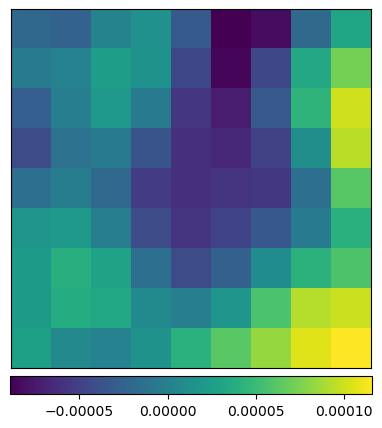

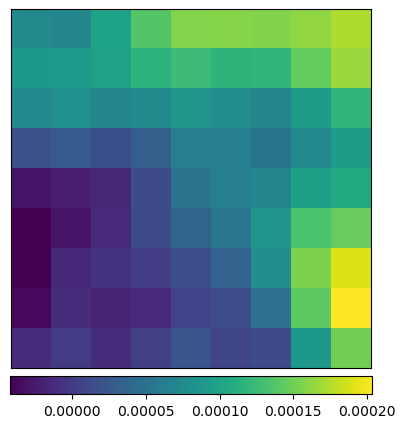

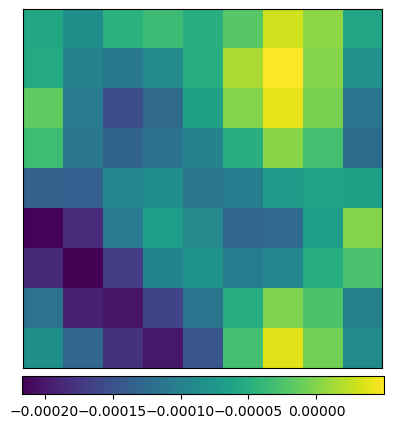

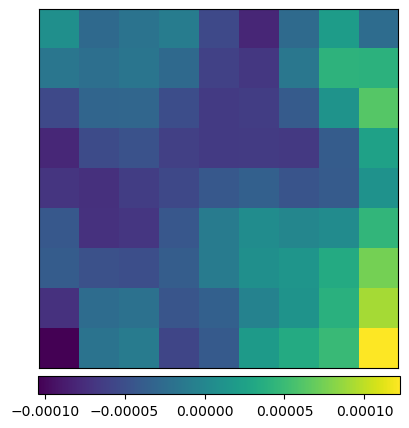

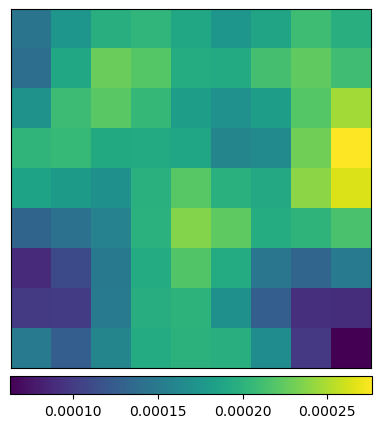

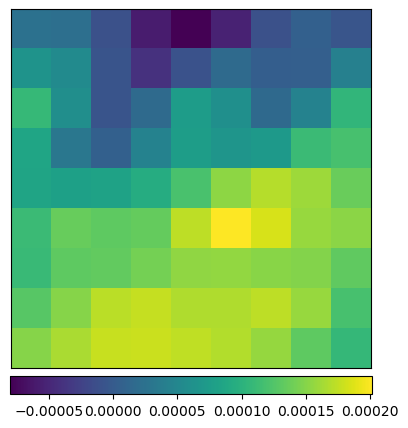

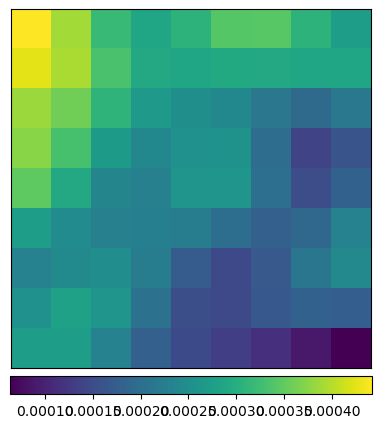

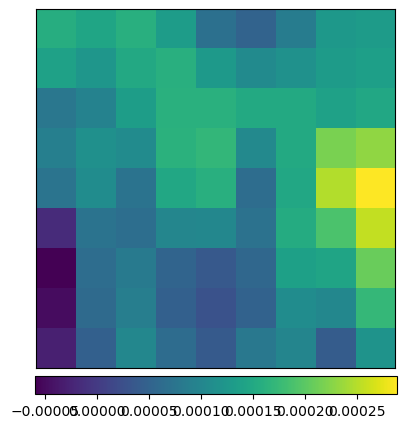

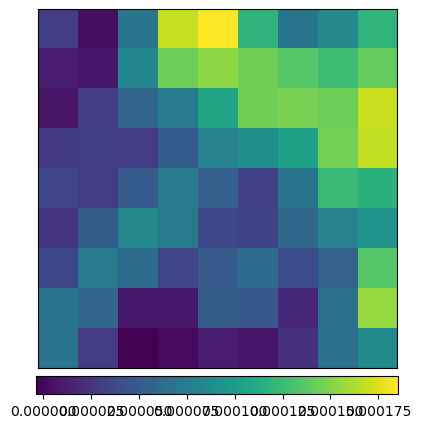

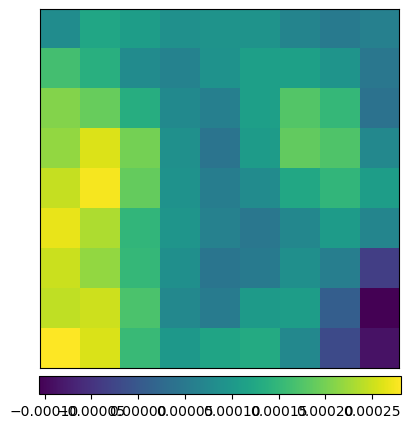

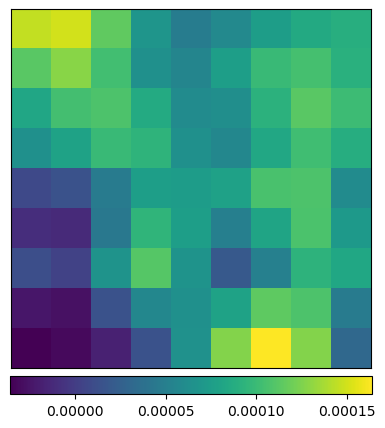

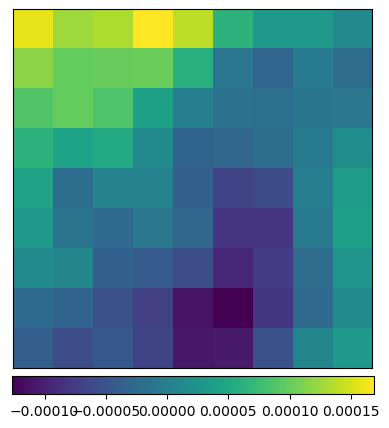

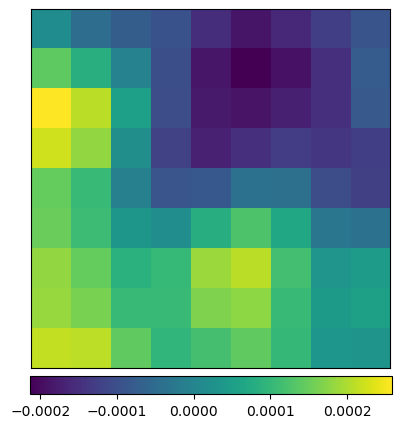

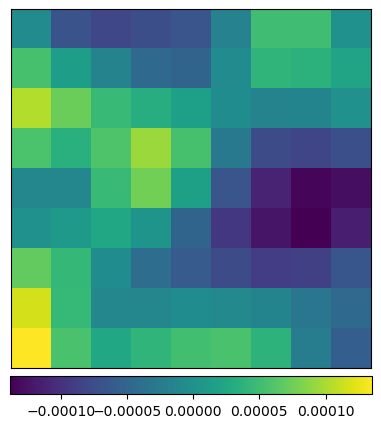

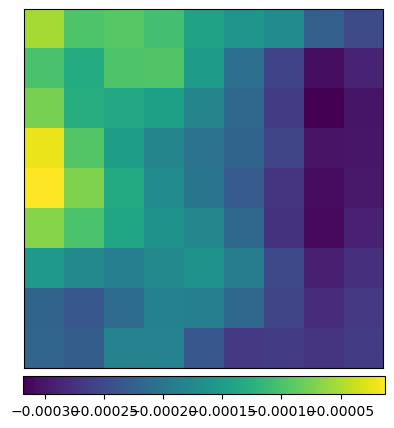

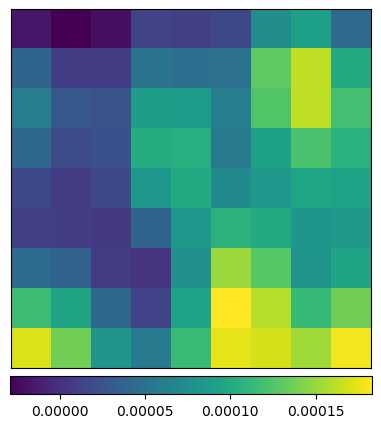

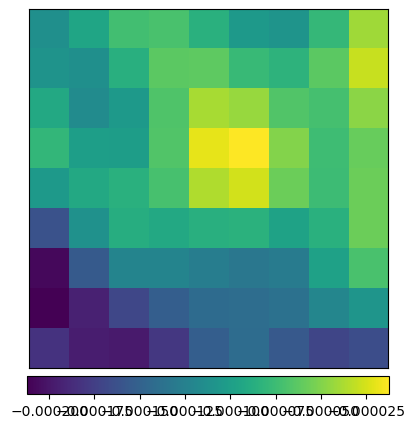

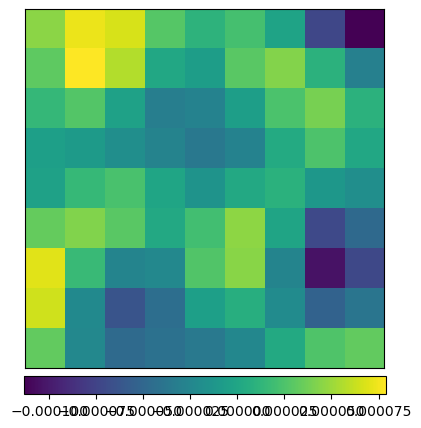

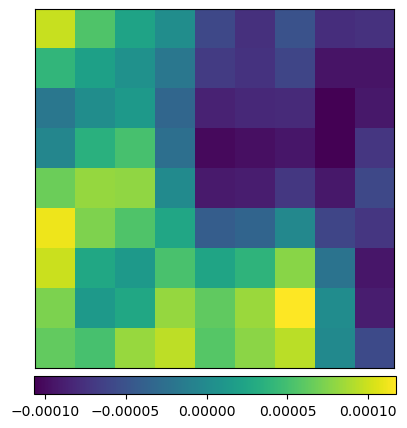

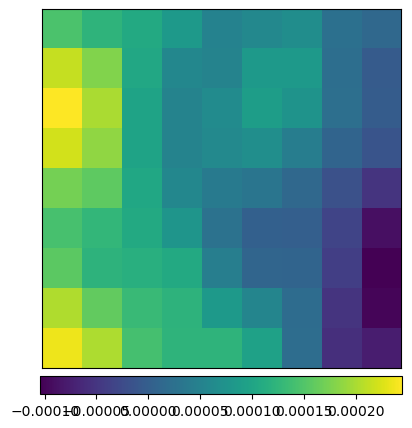

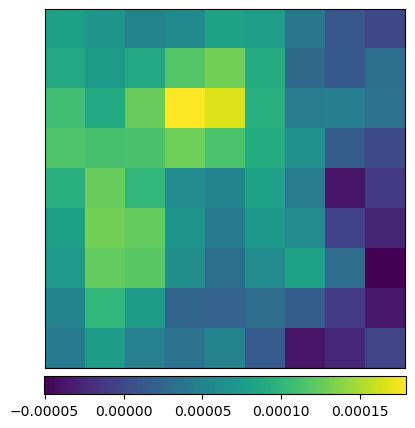

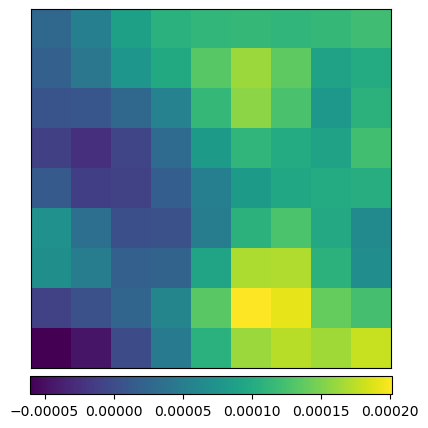

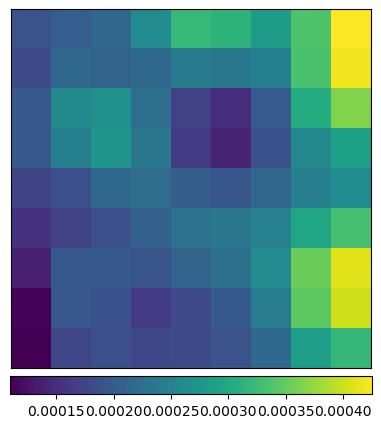

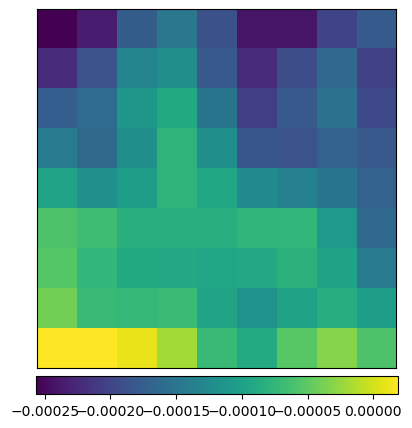

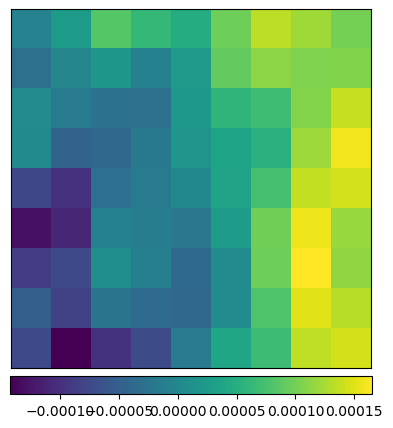

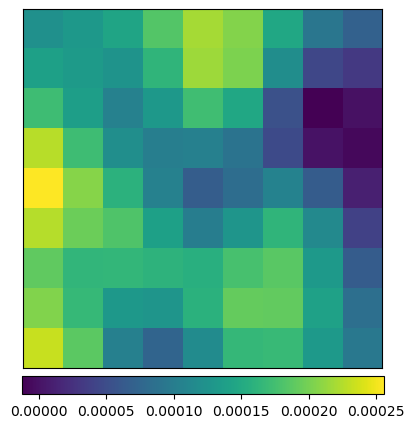

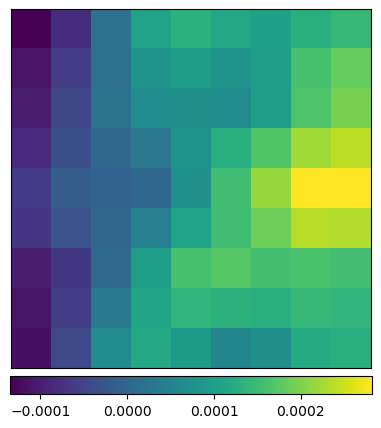

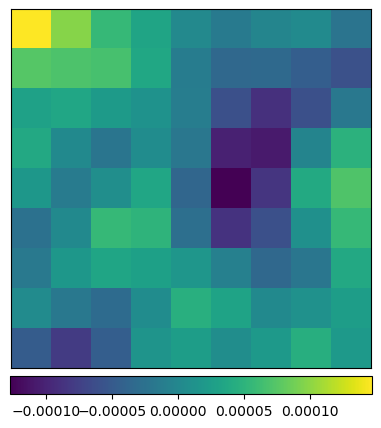

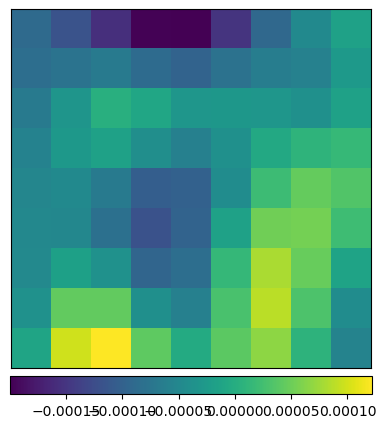

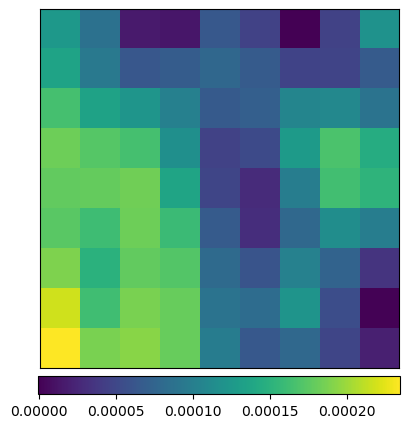

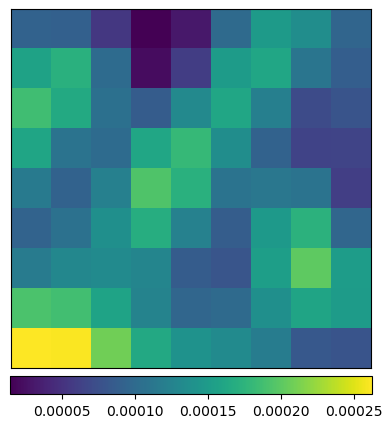

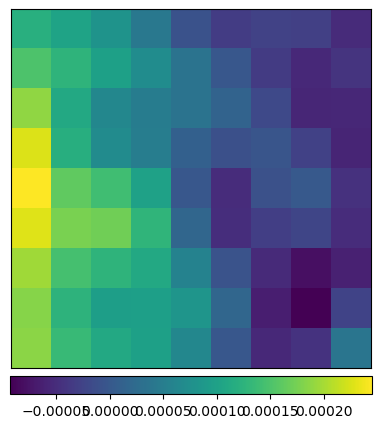

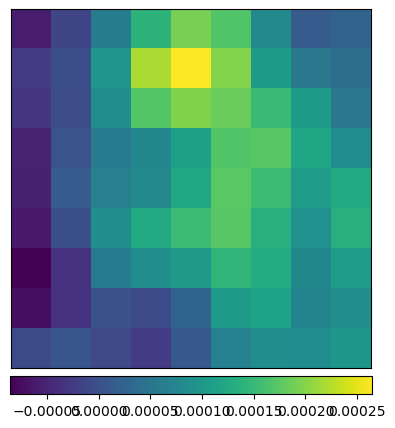

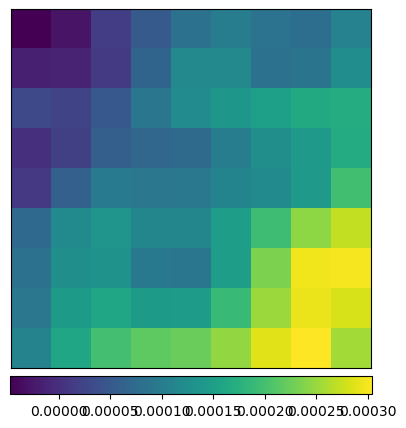

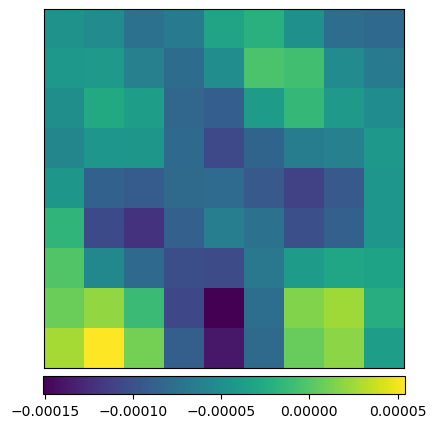

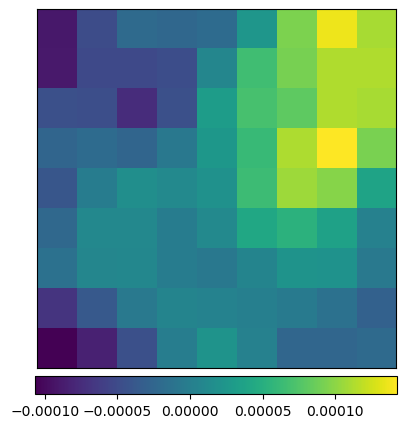

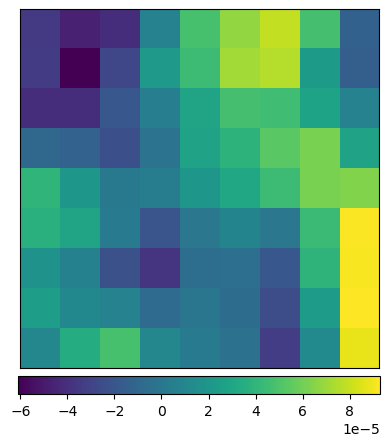

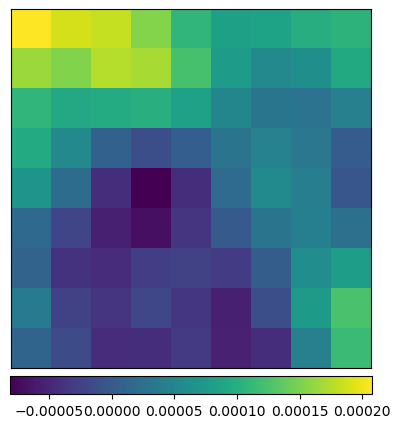

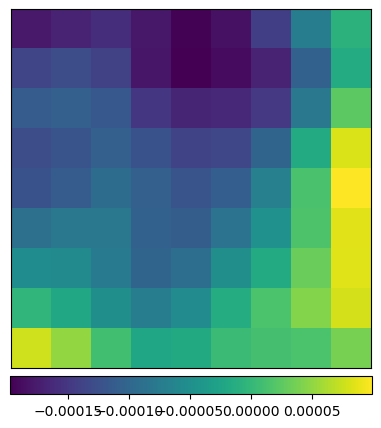

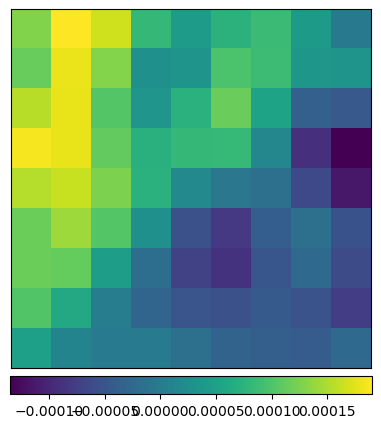

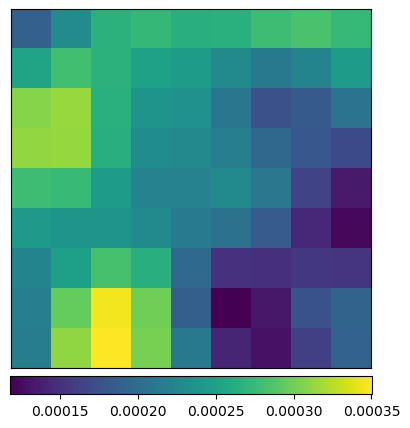

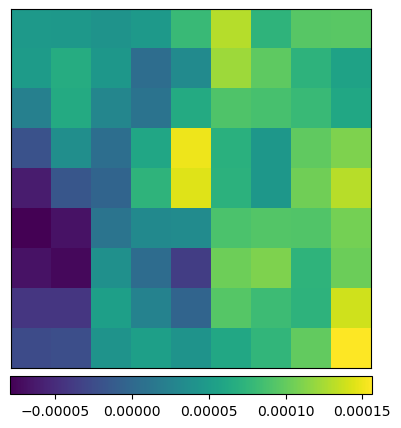

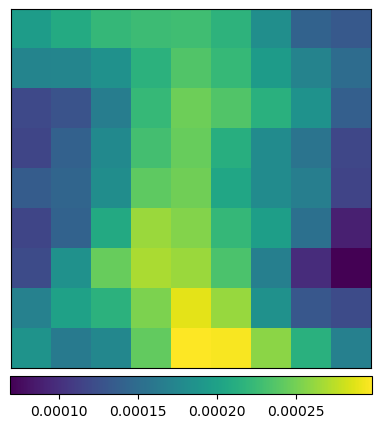

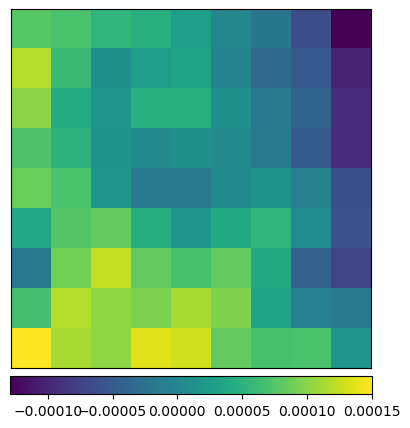

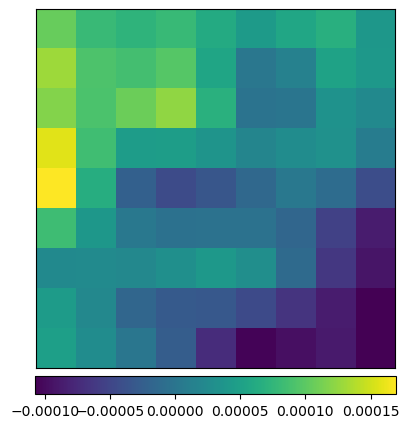

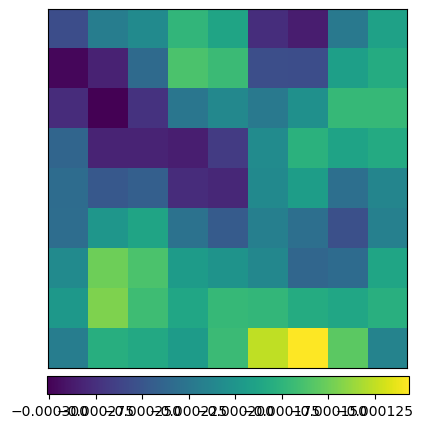

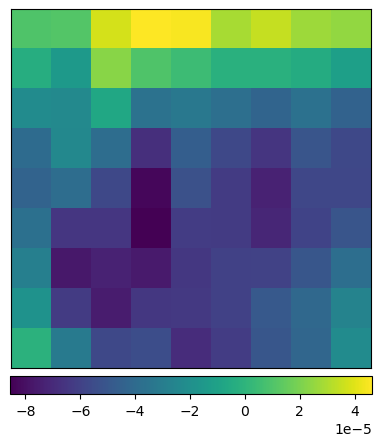

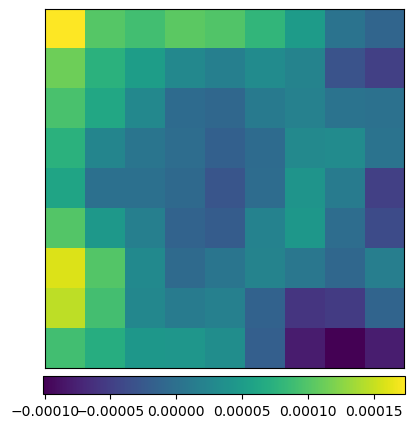

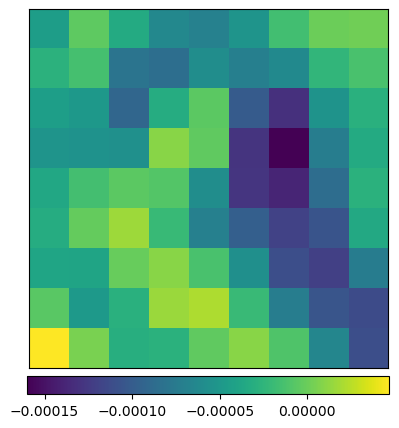

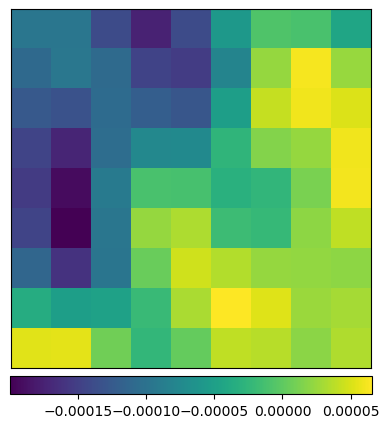

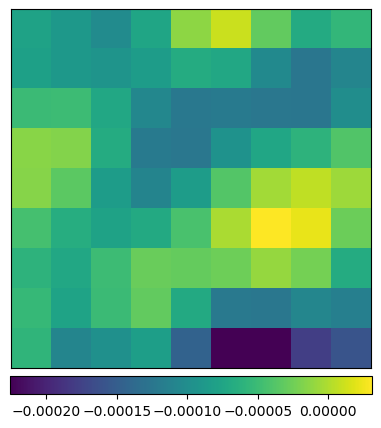

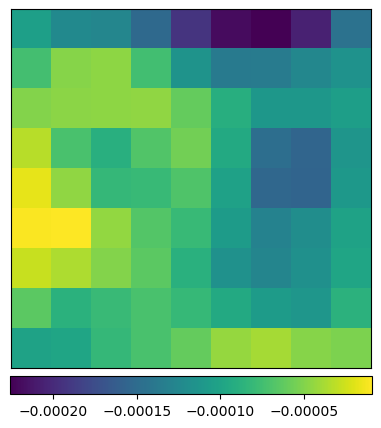

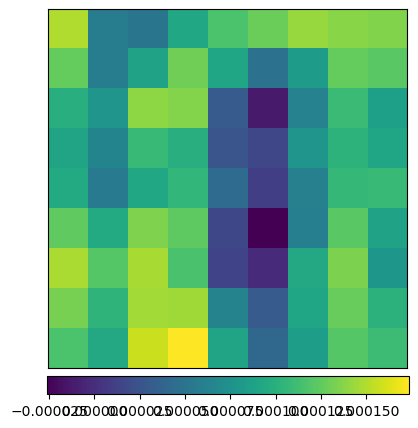

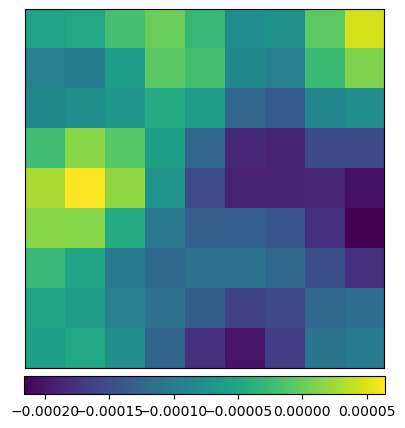

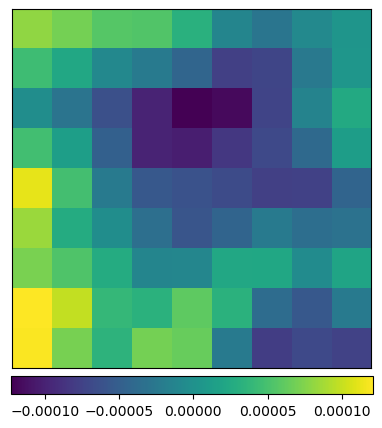

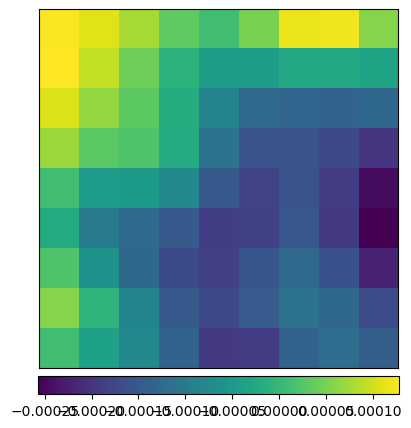

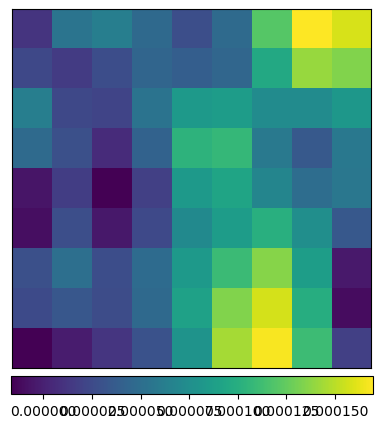

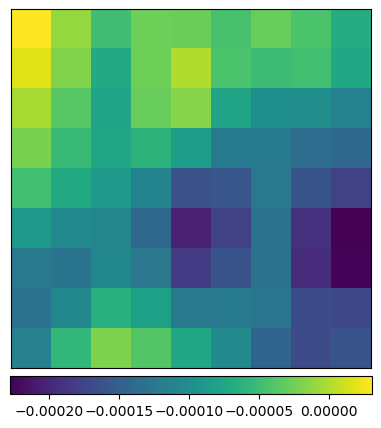

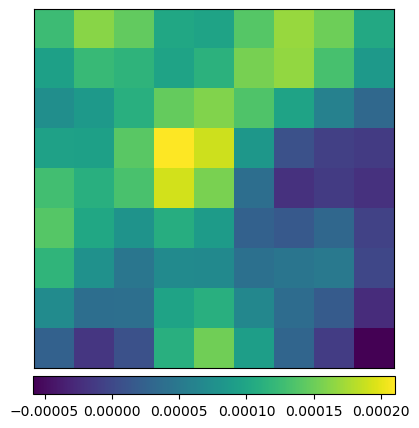

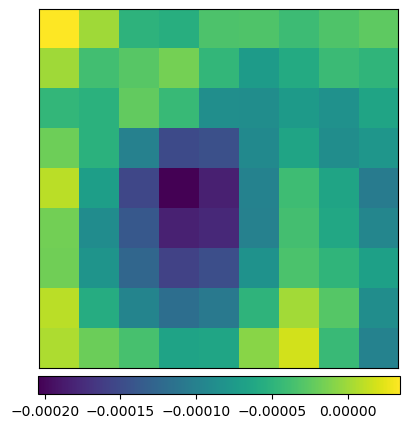

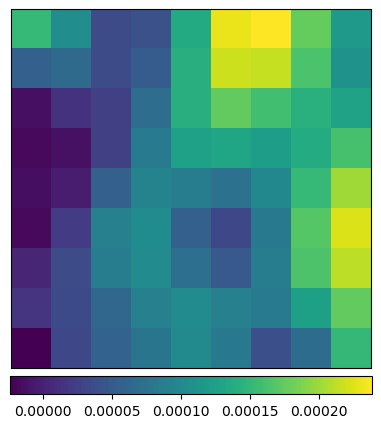

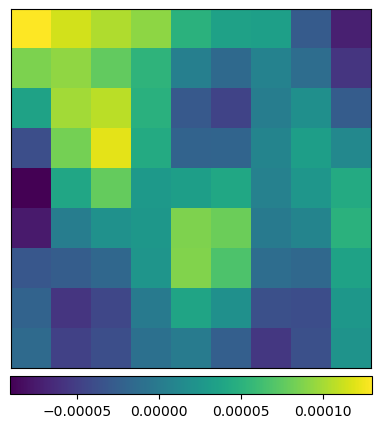

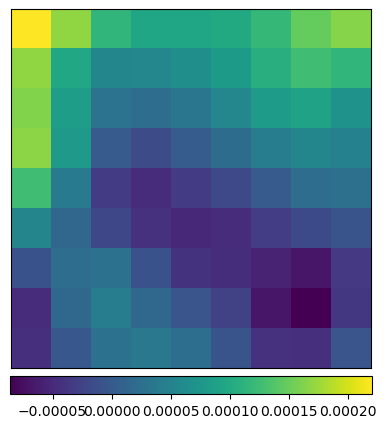

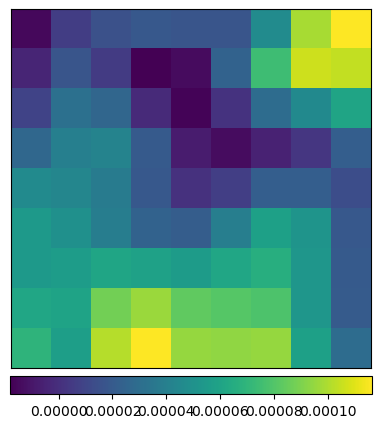

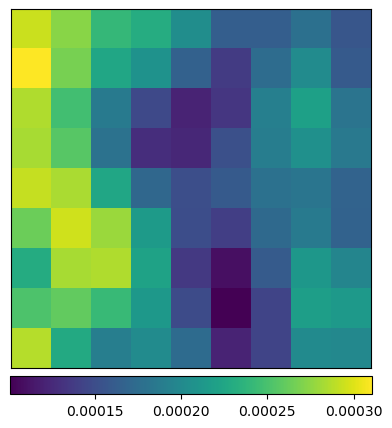

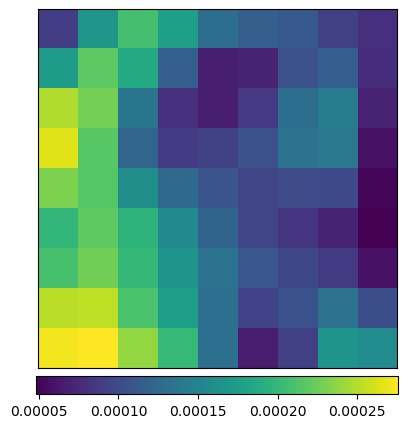

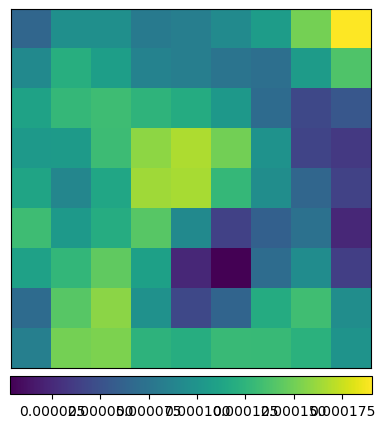

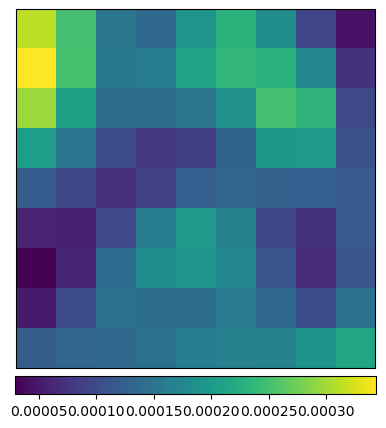

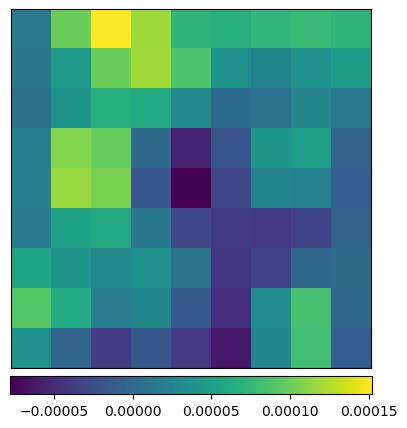

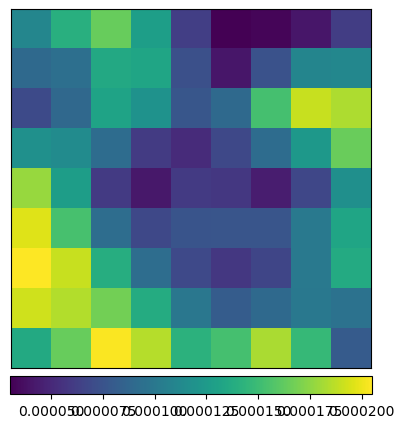

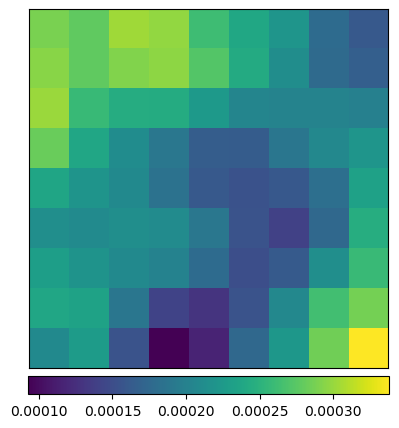

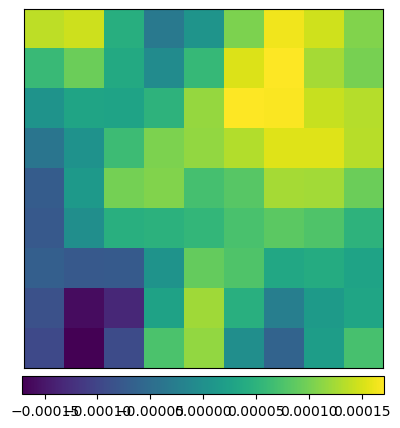

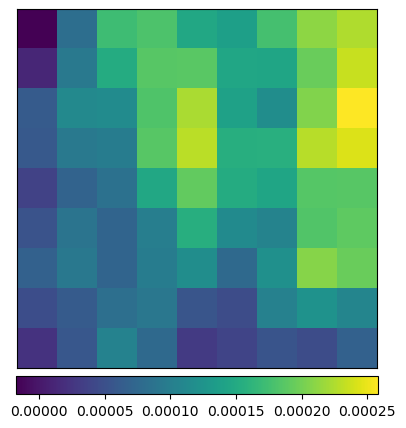

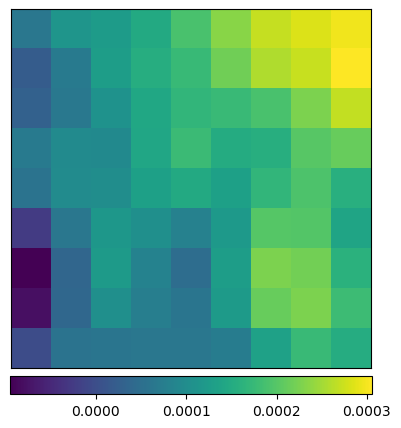

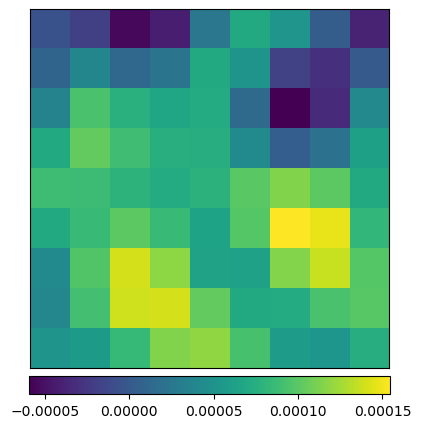

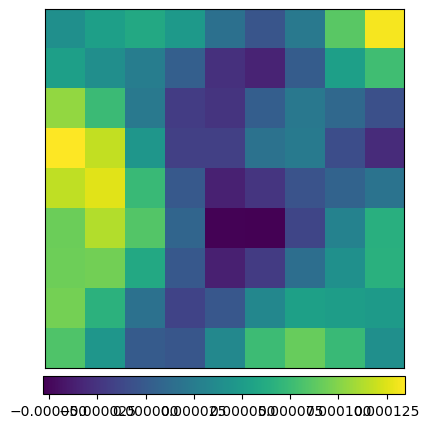

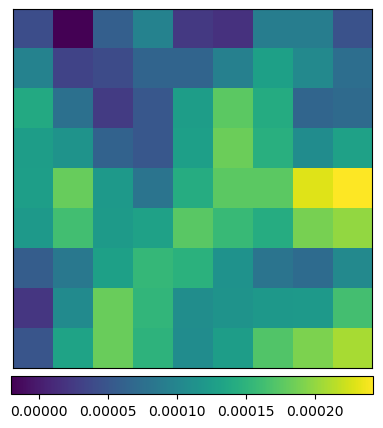

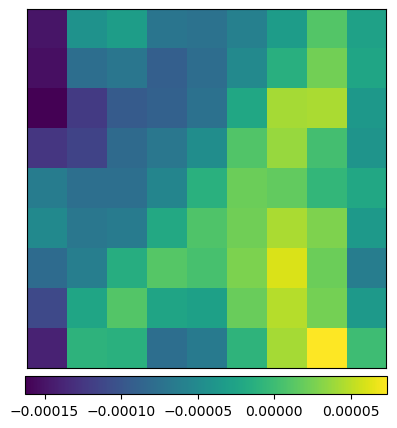

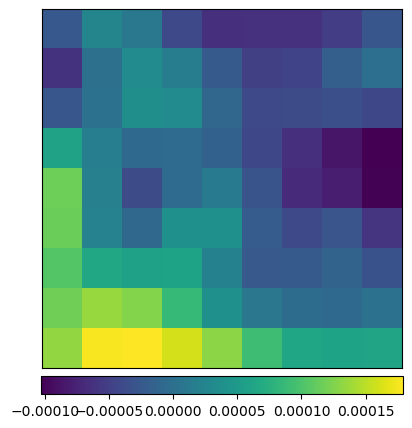

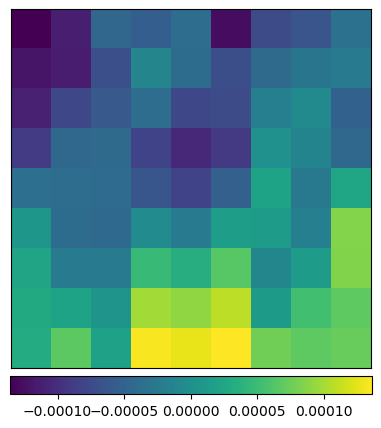

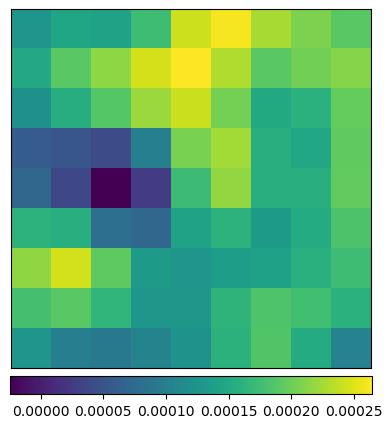

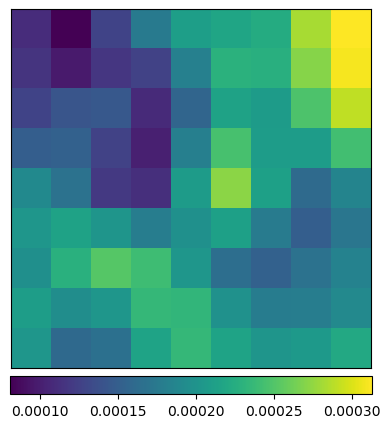

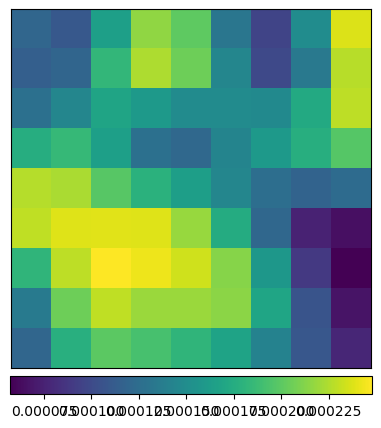

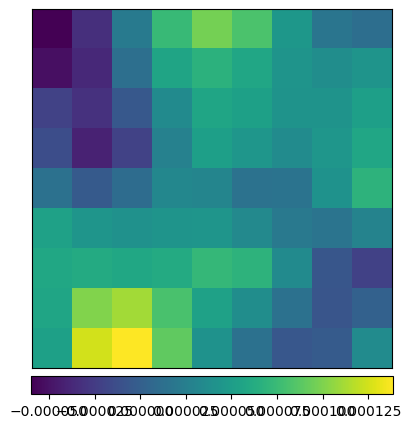

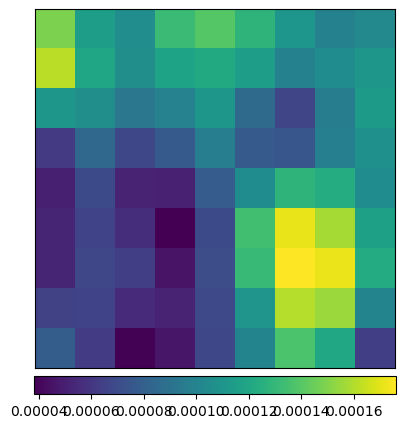

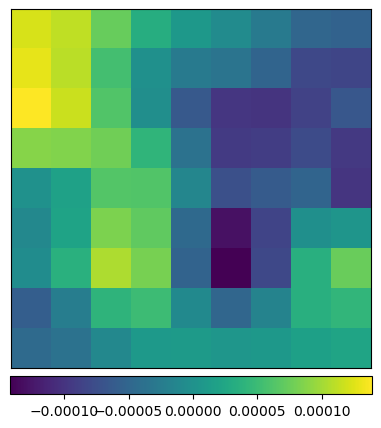

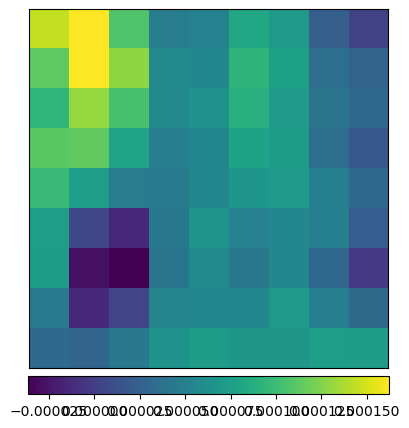

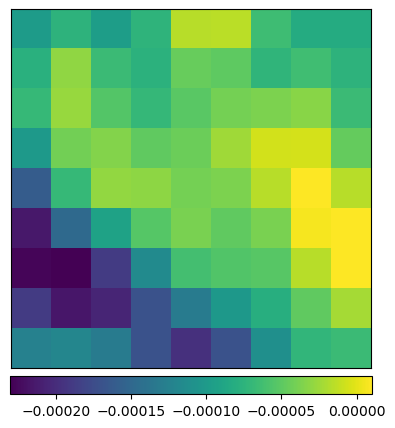

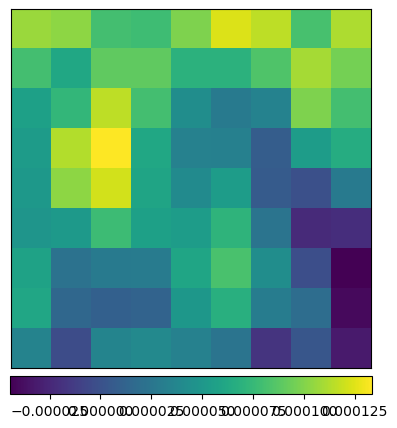

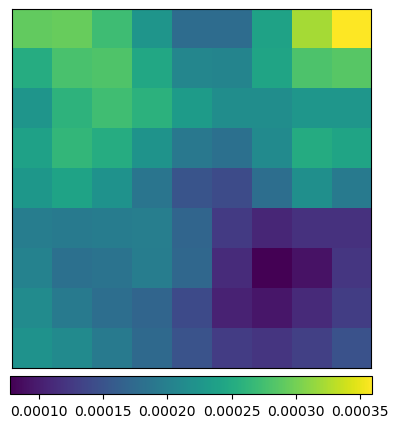

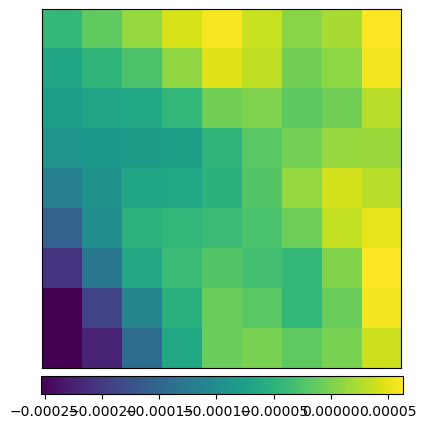

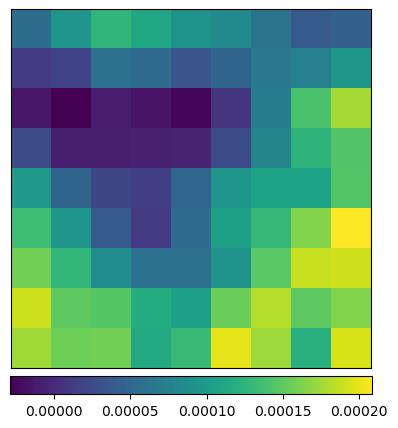

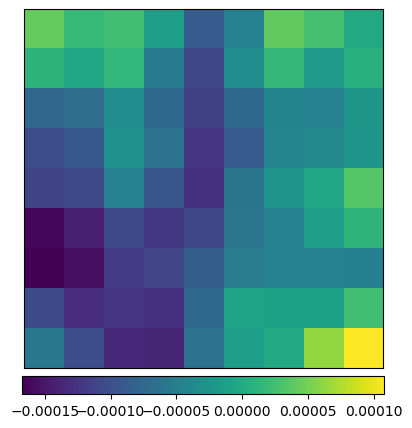

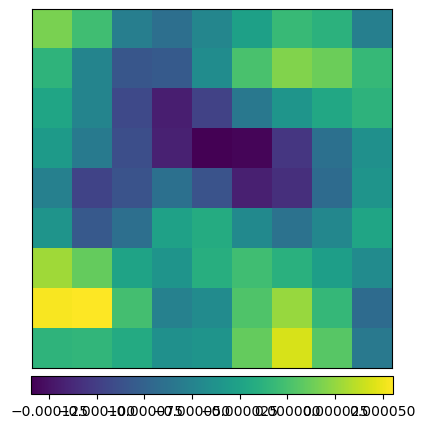

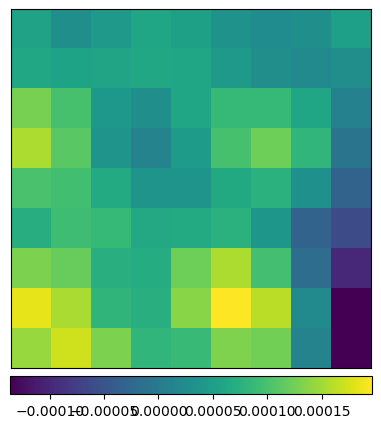

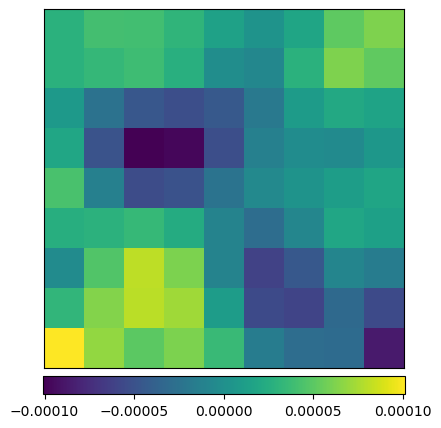

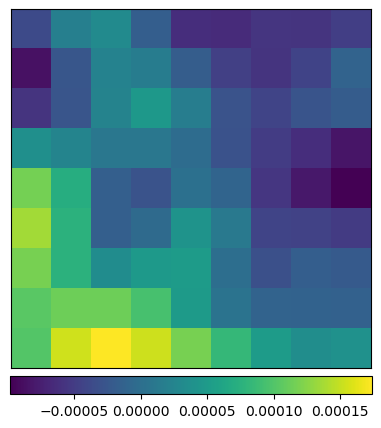

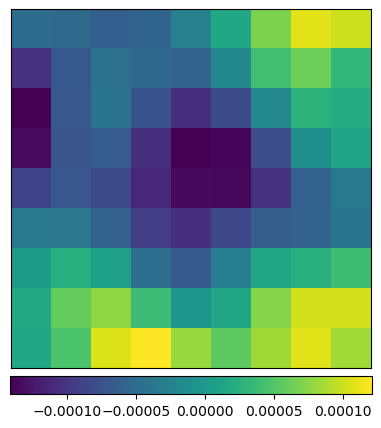

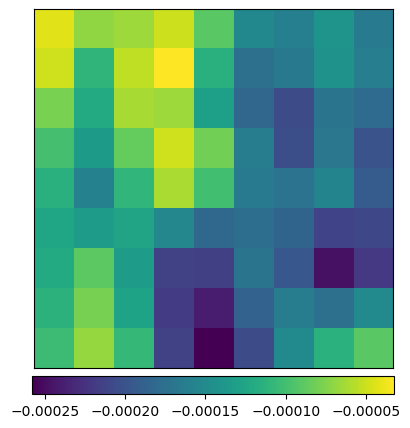

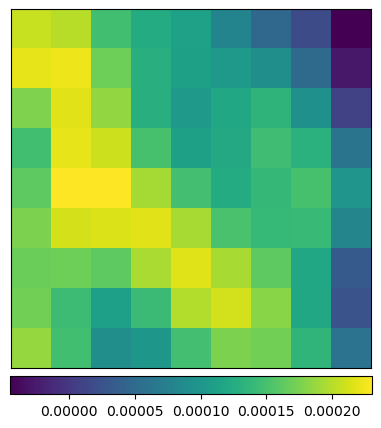

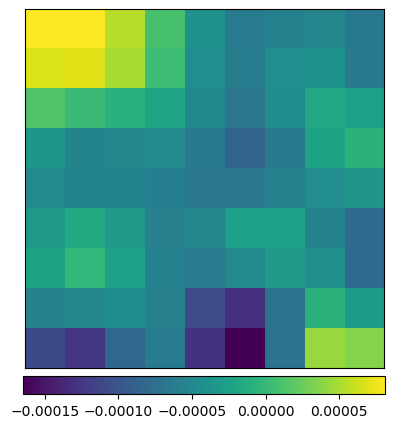

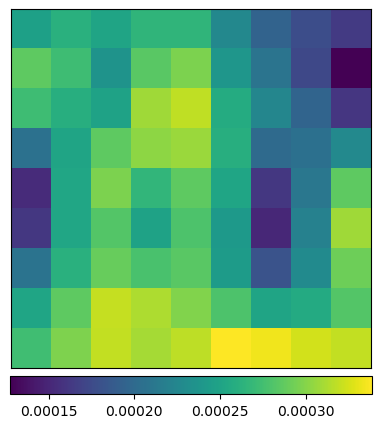

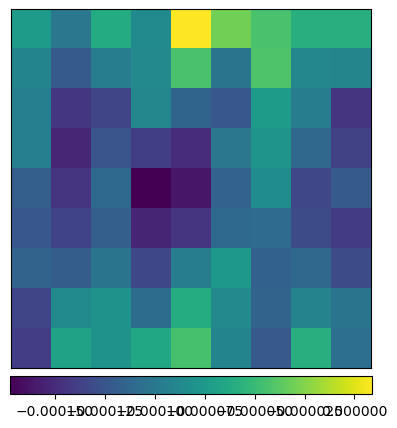

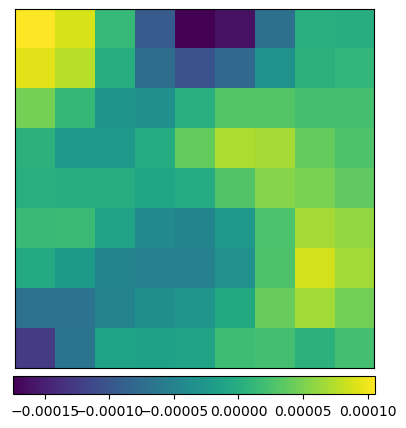

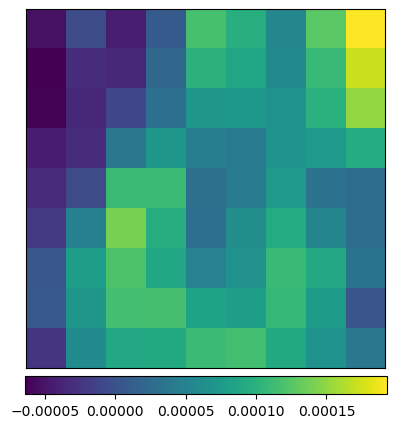

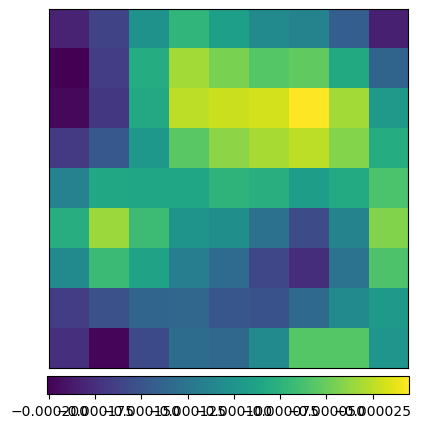

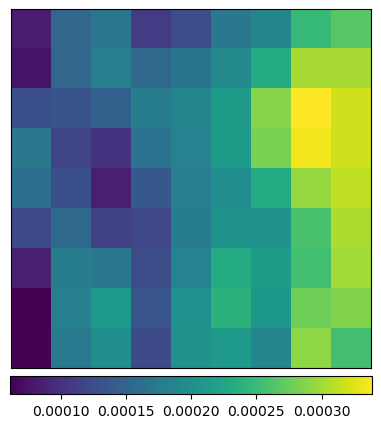

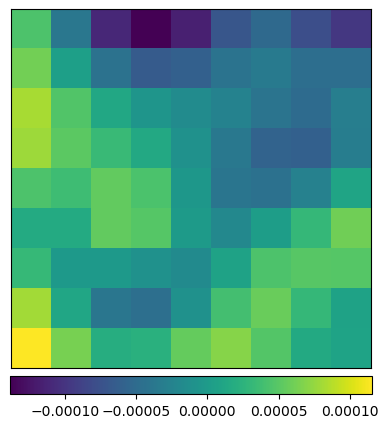

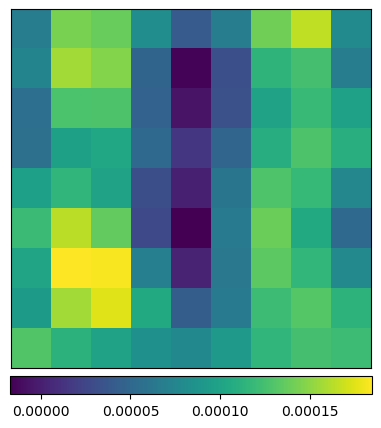

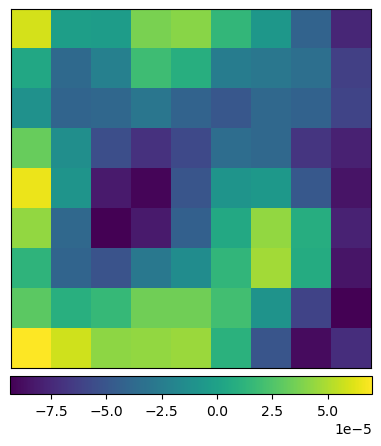

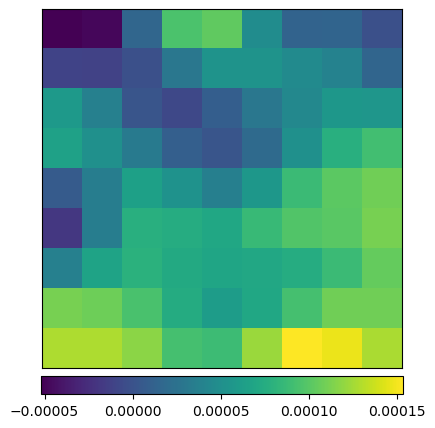

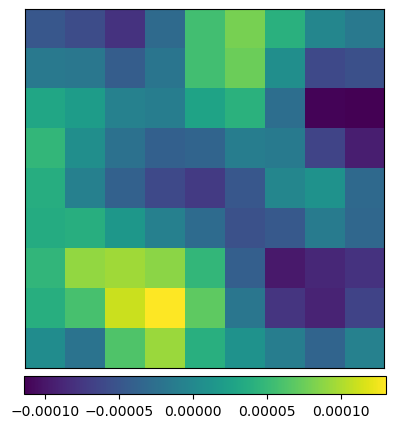

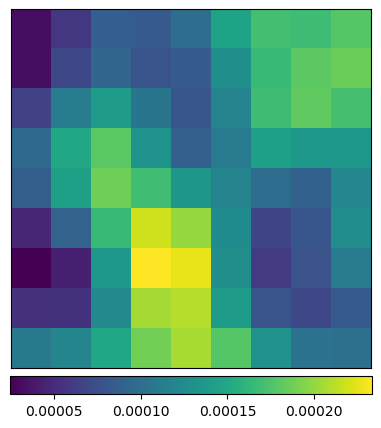

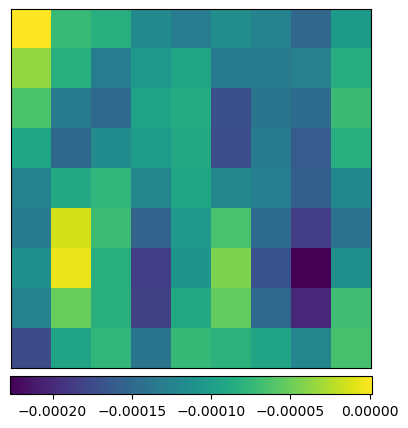

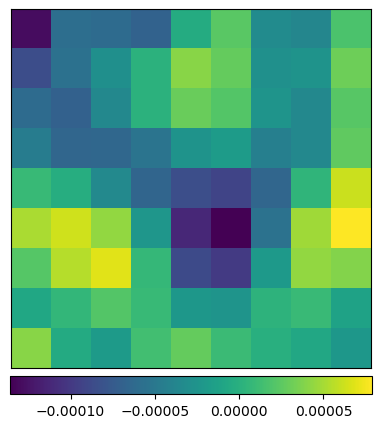

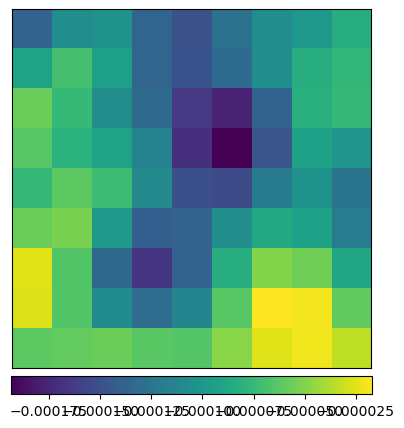

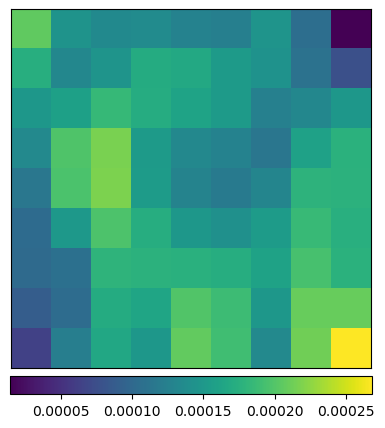

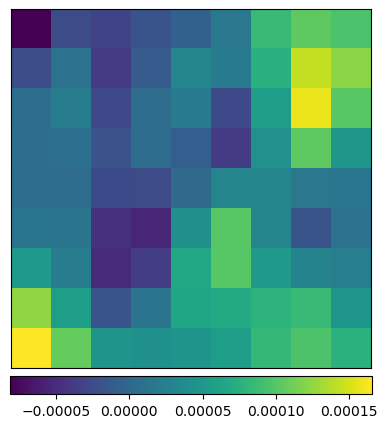

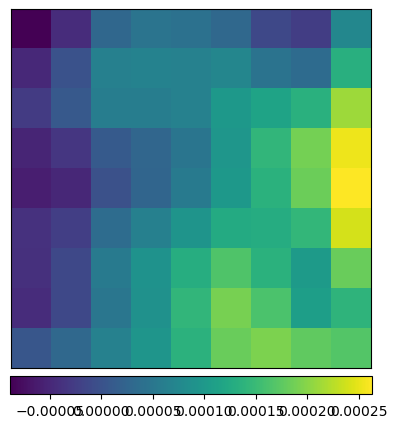

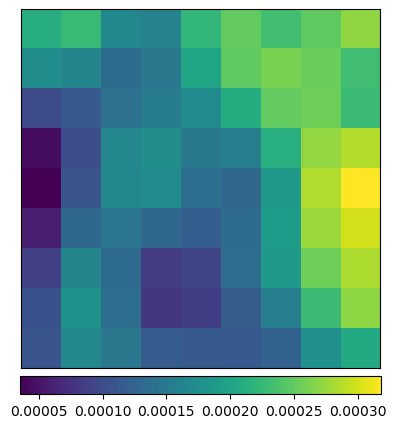

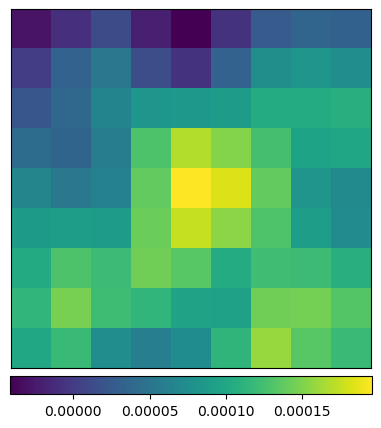

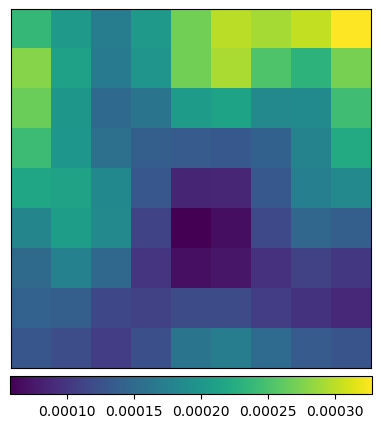

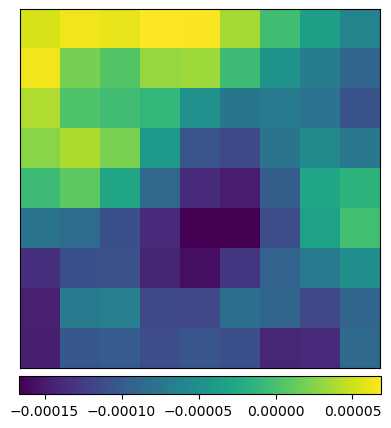

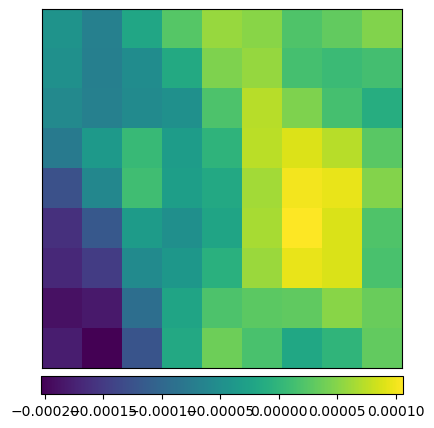

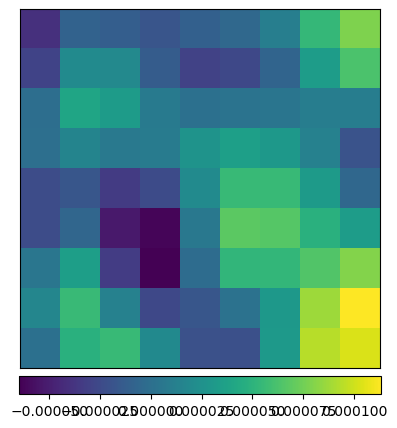

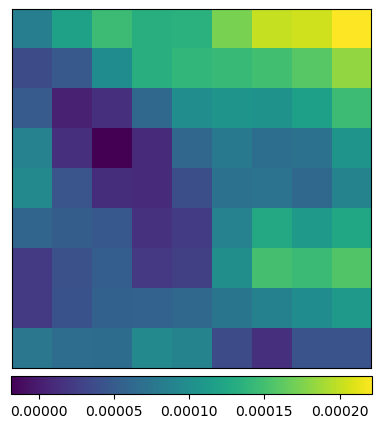

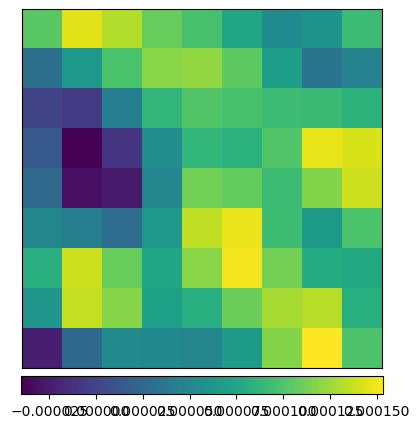

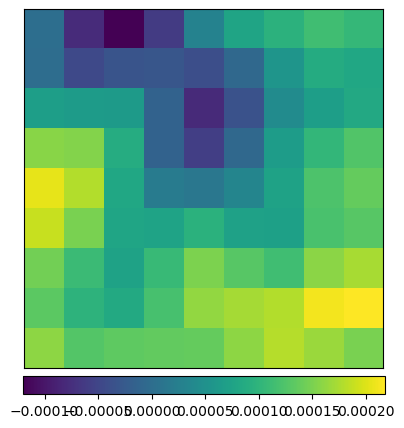

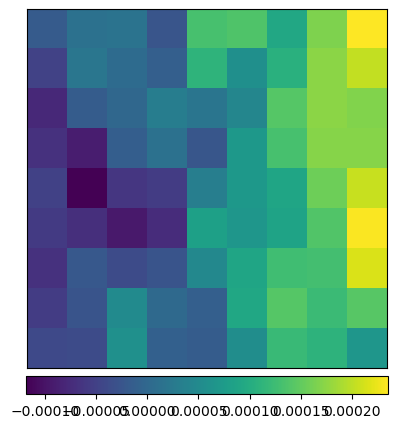

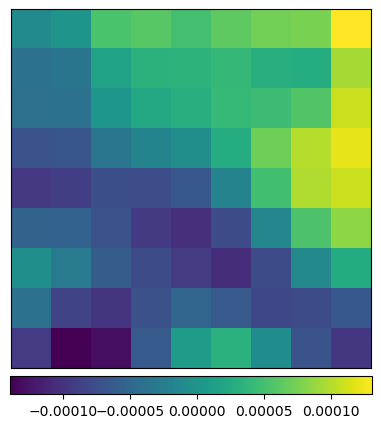

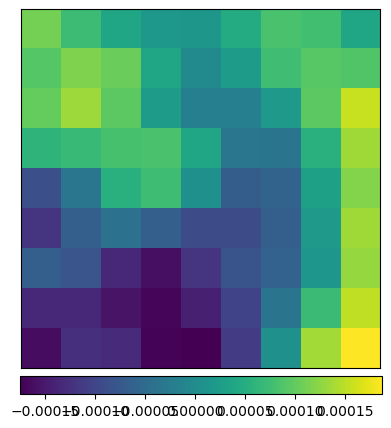

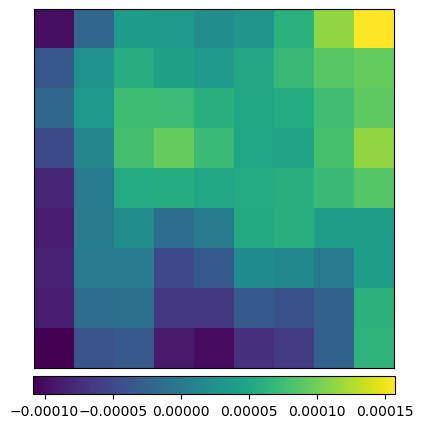

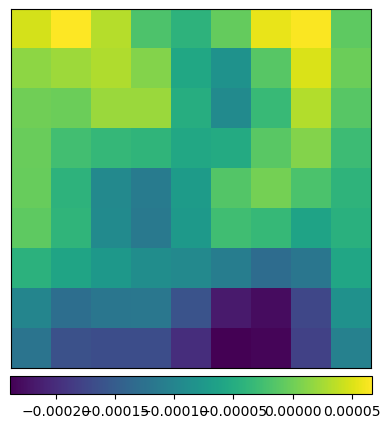

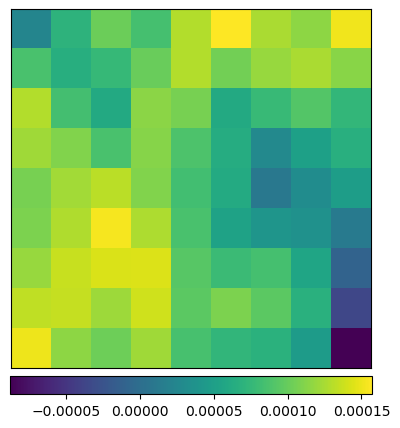

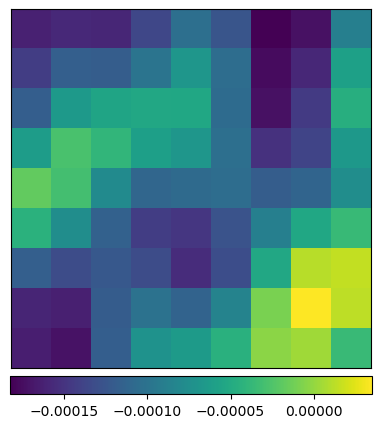

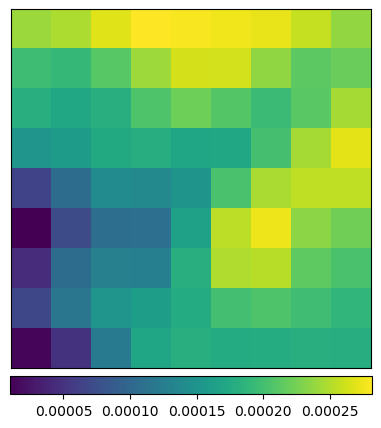

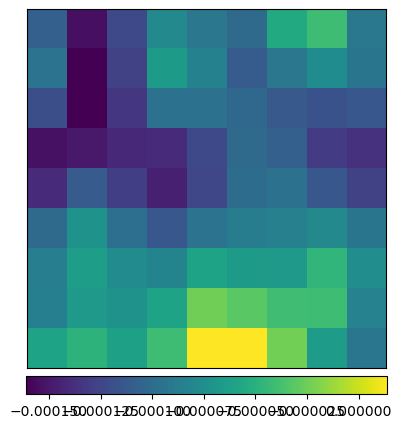

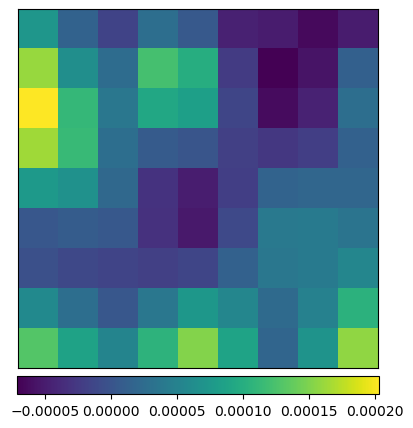

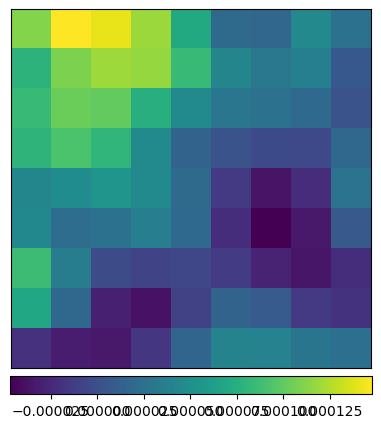

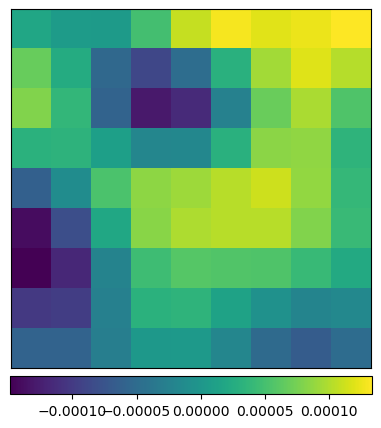

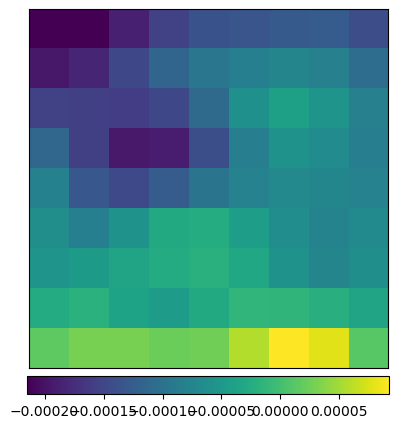

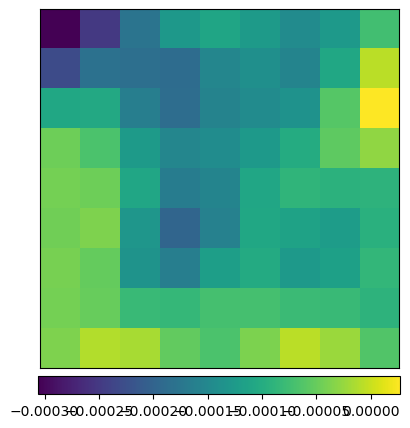

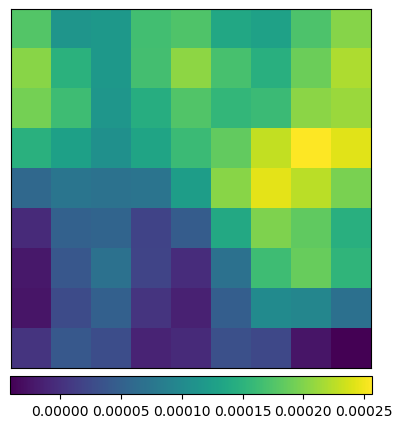

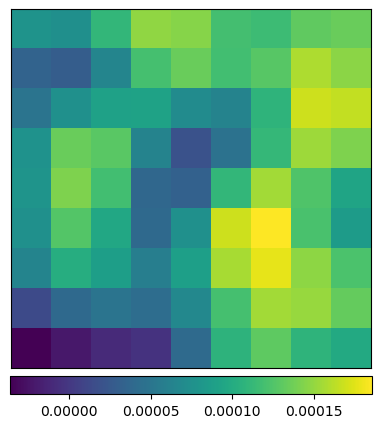

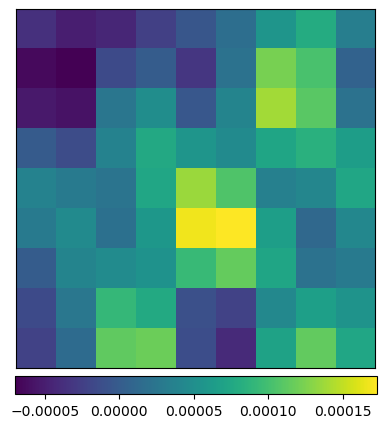

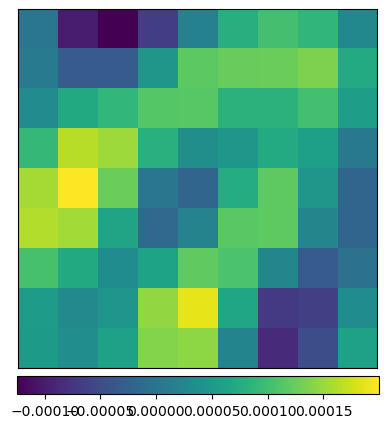

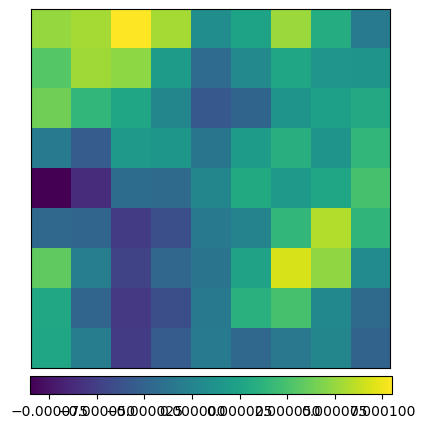

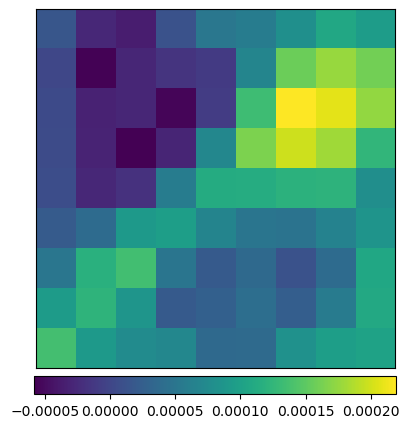

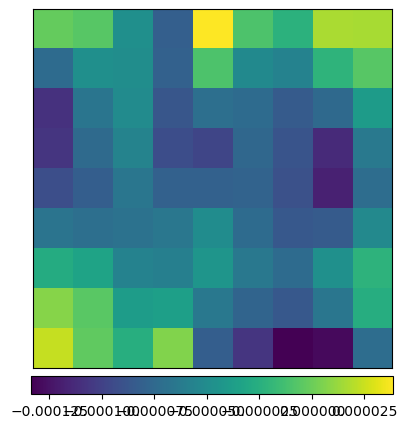

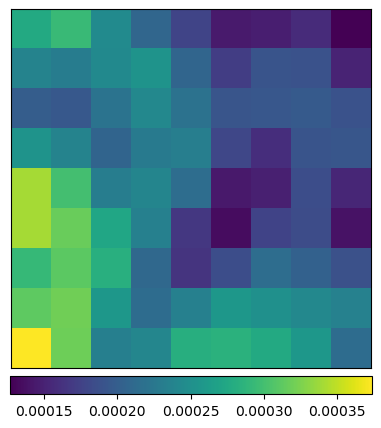

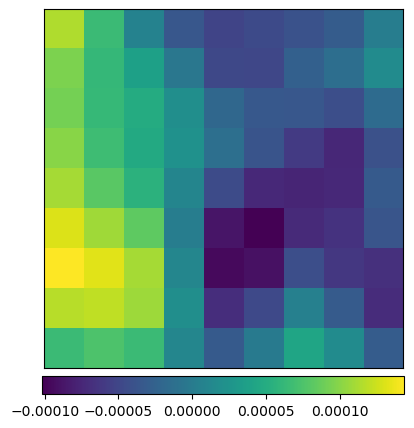

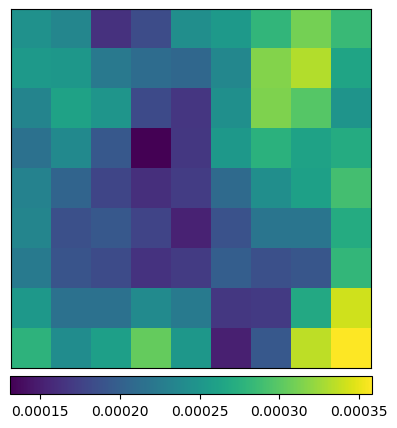

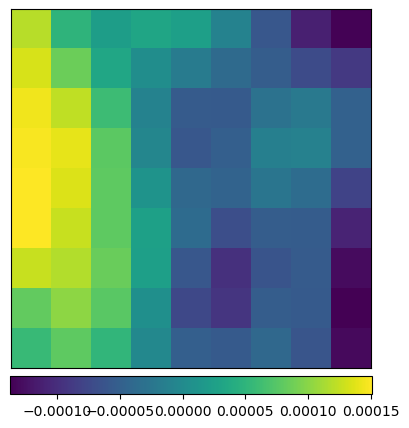

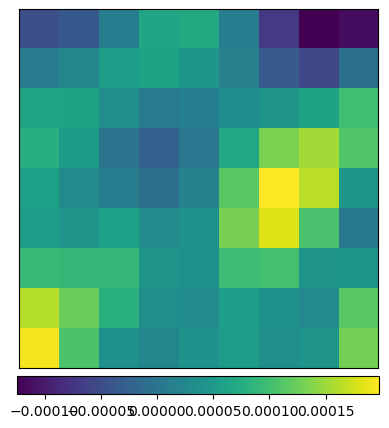

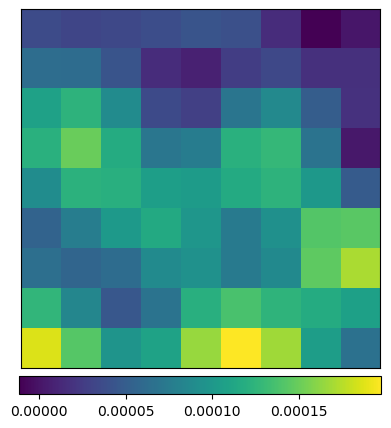

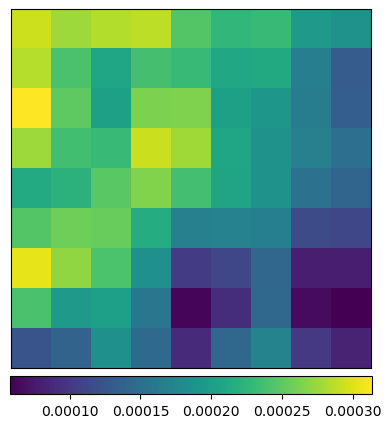

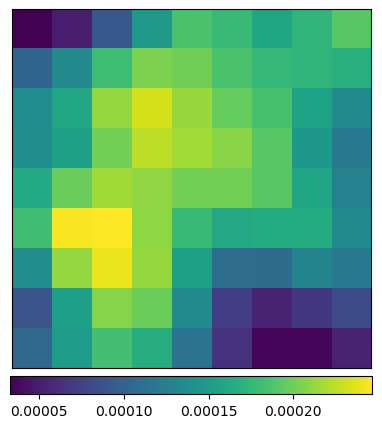

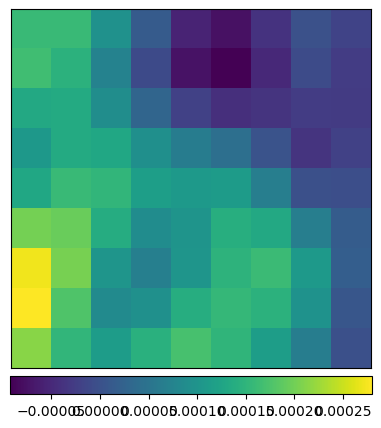

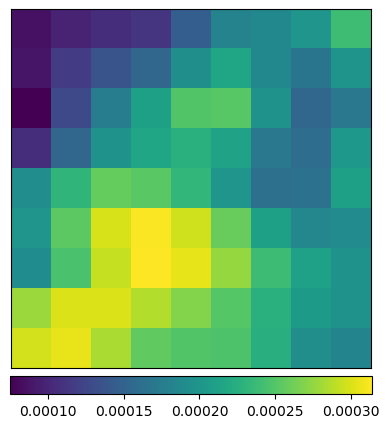

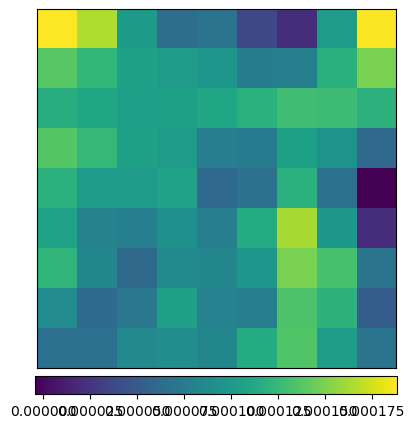

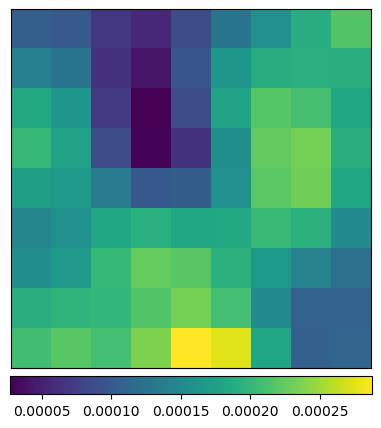

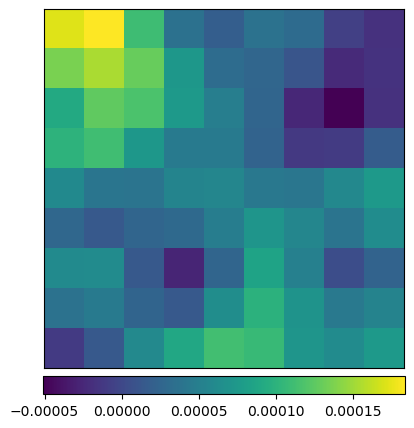

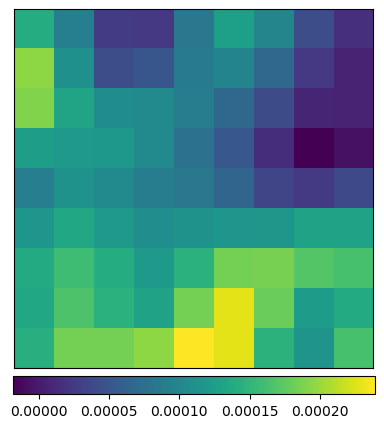

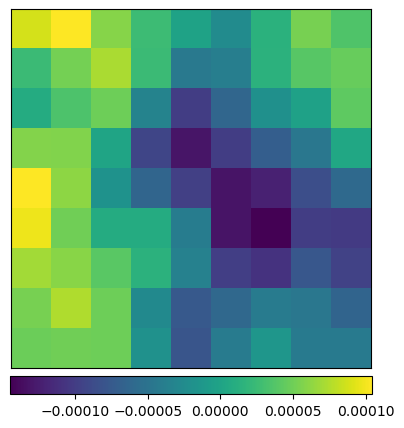

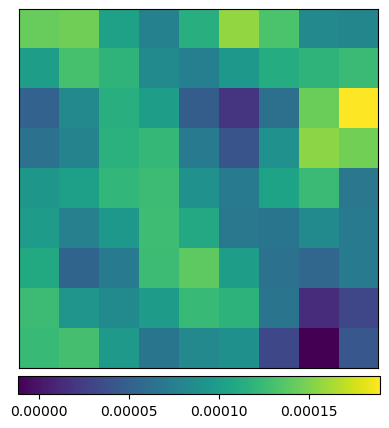

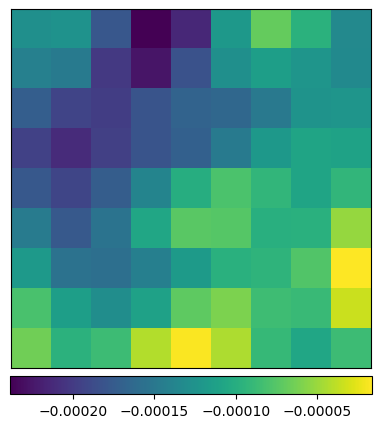

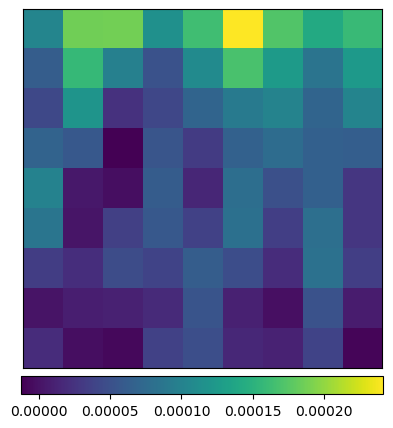

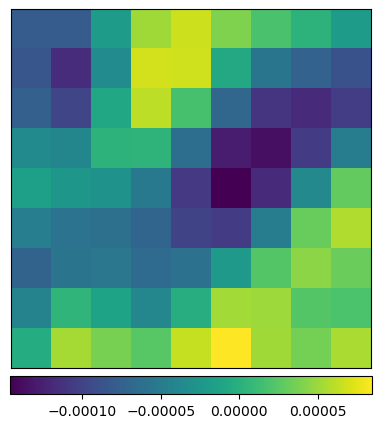

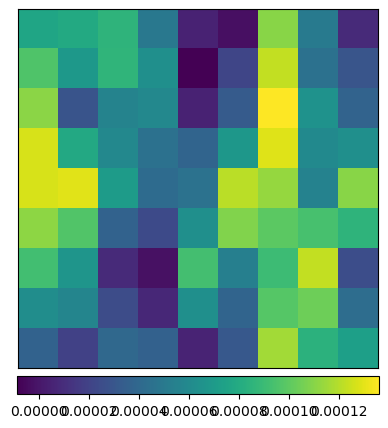

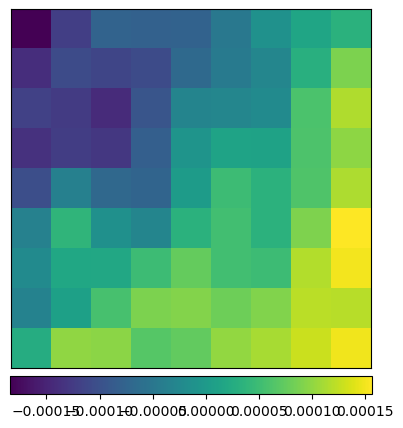

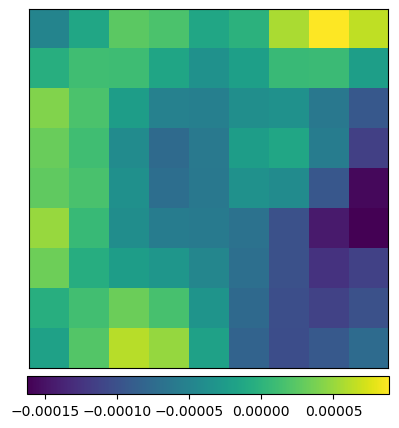

KeyboardInterrupt: 

In [14]:
# font_path = "data/cmunrm.ttf"
# font_manager.fontManager.addfont(font_path)
# prop = font_manager.FontProperties(fname = font_path)
# plt.rcParams["font.family"] = "sans-serif"
# plt.rcParams["font.sans-serif"] = prop.get_name()
# plt.rcParams["axes.unicode_minus"] = False

for i in range(len(awd.amf_ra.values)):
    dec = awd.amf_dec.values[i]
    ra = awd.amf_ra.values[i]
    
    # extract a set of thumbnail images centered on each set ofcoordinates 
    # (1 per for loop, in this case)
    stamp = reproject.thumbnails(map_pix, coords = np.deg2rad([dec, ra]), r = windowlen*utils.arcmin)
    
    f, ax = plt.subplots(figsize = (5, 5))
    
    # Display image as 2D raster (Matplotlib)
    f1 = ax.imshow(stamp[0])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.colorbar(mappable = f1, ax = ax, orientation = "horizontal", fraction = 0.047, pad = 0.02)
    scalebar = AnchoredSizeBar(ax.transData,
                              4.4, "", "center left",
                              pad = 0,
                              sep = 7,
                              color = "white",
                              frameon = False,
                              size_vertical = 0.02)
#     ax.add_artist(scalebar)
#     ax.text(0.1, 0.4, 'R = 10$\,$\''.format(10), c= "white", fontsize = 18, transform = ax.transAxes)
    
#     ax.text(0.2, 0.7, "N={}".format(lens[i]), color = "white", fontsize = 20)
    # ax.text(0.2, 7.8, "ROSAT".format(lens[i]), color = "white", fontsize = 20)
    # plt.savefig("output/stackros.png")
    
    plt.show()
    
    

In [9]:
# Categories
# 0 - AMF
# 1 - Zou subset DES
# 2 - Zou subset DESI
# 3 - Zou subset HSC
# 4 - WH22

## Some Samples ##

In [2]:
awd = pd.read_csv("data/union3.csv", skiprows= 0)

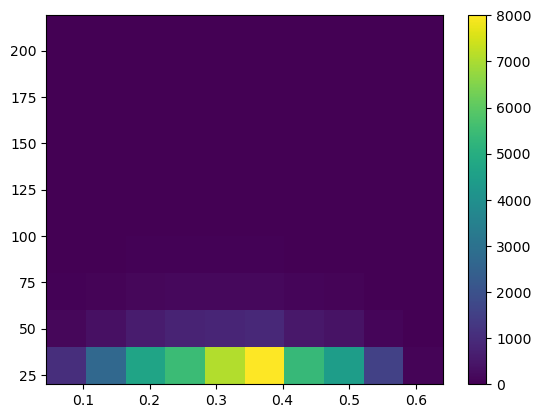

In [14]:
# Catalogue 0 - AMF

awd0 = awd[awd["cat"] == 0]
fig = plt.hist2d(awd0["z"], awd0["rh"])
plt.colorbar()
plt.show()

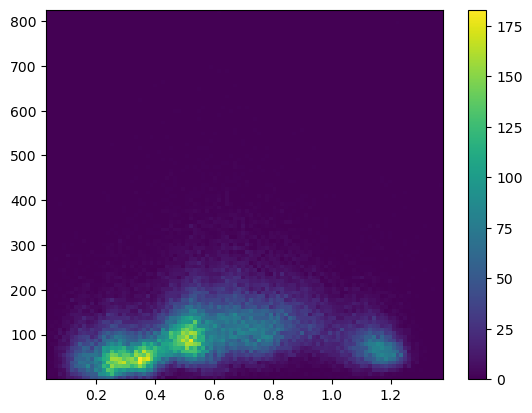

In [5]:
# Catalogue 1 - Zou DES

awd1 = awd[awd["cat"] == 1]
fig = plt.hist2d(awd1["z"], awd1["rh"], bins = (100,100))
plt.colorbar()
plt.show()

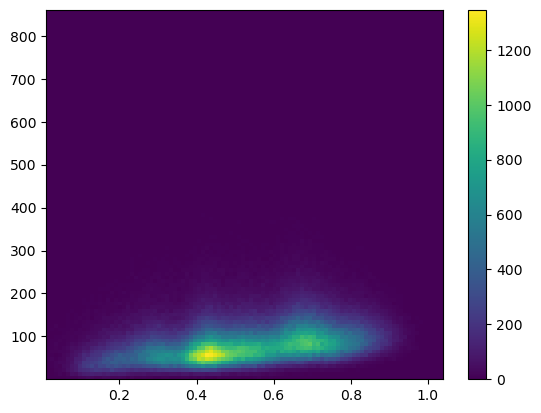

In [6]:
# Catalogue 2 - Zou DESI

awd2 = awd[awd["cat"] == 2]
fig = plt.hist2d(awd2["z"], awd2["rh"], bins = (100, 100))
plt.colorbar()
plt.show()

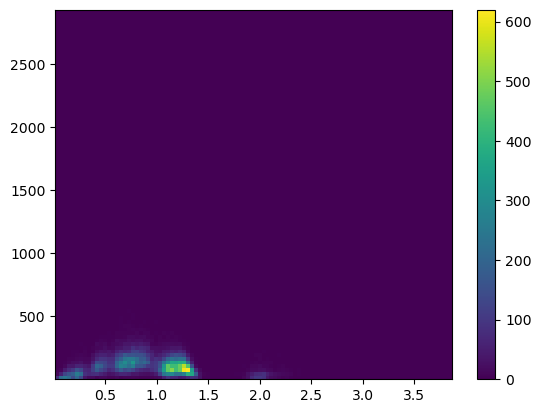

In [7]:
# Catalogue 3 - Zou HSC

awd3 = awd[awd["cat"] == 3]
fig = plt.hist2d(awd3["z"], awd3["rh"], bins = (100,100))
plt.colorbar()
plt.show()

In [ ]:
# Restrict richness to 1.5

# Richness is NOT the same thing across catalogues

# Title
# Integrated signal abov

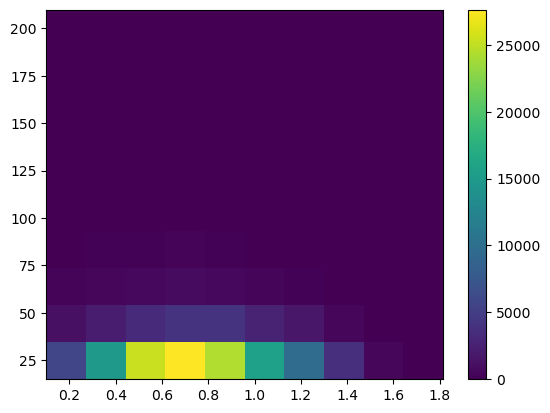

In [18]:
# Catalogue 4 - WH22

awd4 = awd[awd["cat"] == 4]
fig = plt.hist2d(awd4["z"], awd4["rh"])
plt.colorbar()
plt.show()

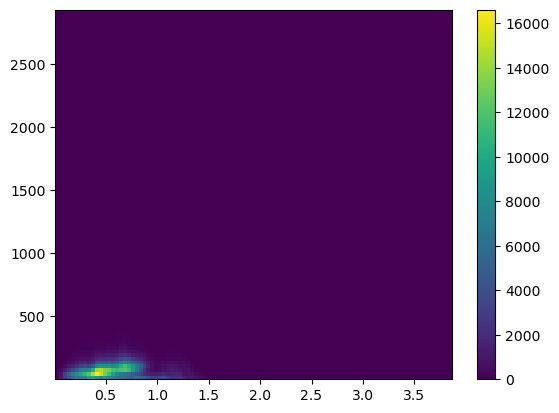

In [20]:
# All Catalogues

fig = plt.hist2d(awd["z"], awd["rh"], bins = (100,100))
plt.colorbar()
plt.show()

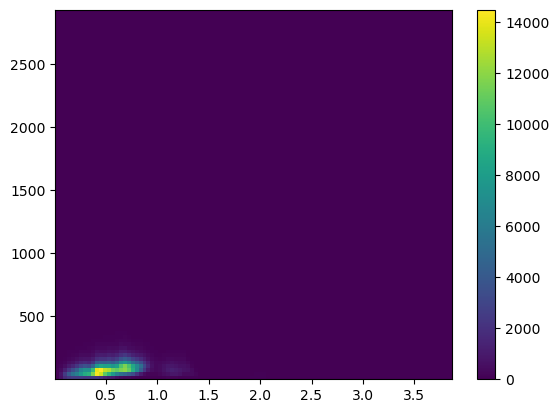

In [25]:
# Zou Catalogues only (1,2,3)

awd_Zou = awd[(awd["cat"] == 1) | (awd["cat"] == 2) | (awd["cat"] == 3)]
fig = plt.hist2d(awd_Zou["z"], awd_Zou["rh"], bins = (100,100))
plt.colorbar()
plt.show()

## Trying to Manually Find Cumulative Distribution Function - WH22

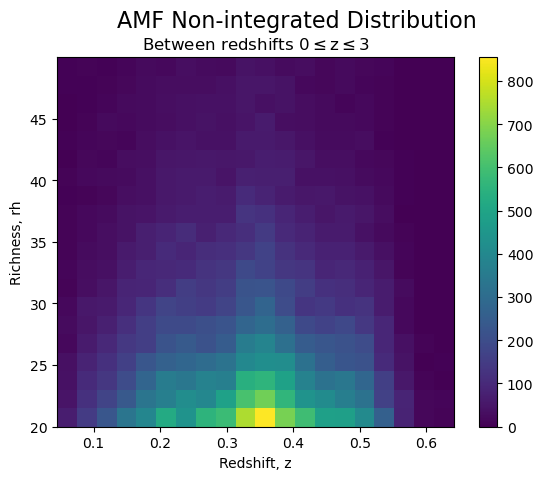

In [6]:
catalogue = 0
z_lb = 0
z_hb = 3
rh_lb = 0
rh_hb = 50
bin_num = 20
cat_names = ["AMF", "Zou DES", "Zou DESI", "Zou HSC", "WH22"]

awd_cat = awd[(awd["cat"] == catalogue) & (awd["z"] >= z_lb) & (awd["z"] <= z_hb) 
               & (awd["rh"] >= rh_lb) & (awd["rh"] <= rh_hb)]
plt.hist2d(awd_cat["z"], awd_cat["rh"], bins = (bin_num, bin_num))
plt.title("Between redshifts " + str(z_lb) + "$\leq$z$\leq$" + str(z_hb), fontsize = 12)
plt.xlabel("Redshift, z")
plt.ylabel("Richness, rh")

plt.suptitle(cat_names[catalogue] + " Non-integrated Distribution", fontsize = 16)
plt.colorbar()
plt.show()

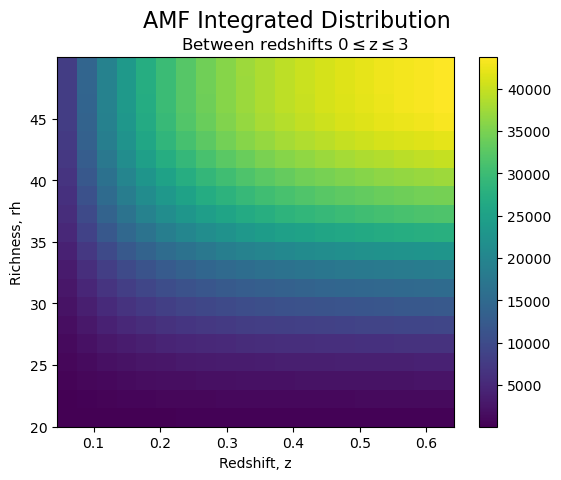

In [48]:
# Understanding the "Integrated" code:

# Histdata is an array storing the histogram value (color) at each coordinate.
# xbins and ybins keep track of the bin edges along the axes
# mesh is irrelevant here
# Change number of bins here

hist_data, xbins, ybins, mesh = plt.hist2d(awd_cat["z"], awd_cat["rh"], bins = (bin_num, bin_num))

# Integrate this histogram data. 
# Pandas cumsum (different from np cumsum - look it up) over the data. axis = 0 is adding each row to the next one.
hist_data = hist_data.cumsum(axis = 0).cumsum(axis = 1)

# Matplotlib pcolormesh is used to plot a color map
plt.pcolormesh(xbins, ybins, hist_data)
plt.suptitle(cat_names[catalogue] + " Integrated Distribution", fontsize = 16)
plt.title("Between redshifts " + str(z_lb) + "$\leq$z$\leq$" + str(z_hb), fontsize = 12, x = 0.6)
plt.xlabel("Redshift, z")
plt.ylabel("Richness, rh")
plt.colorbar()
plt.show()

In [55]:
# Lookup for objects in certain range:

catalogue = 4
z_lb = 1
z_hb = 3
rh_lb = 0
rh_hb = 50

awd_check = awd[(awd["cat"] == catalogue) & (awd["z"] >= z_lb) & (awd["z"] <= z_hb) 
               & (awd["rh"] >= rh_lb) & (awd["rh"] <= rh_hb)]

print("Size: " + str(len(awd_check)))

Size: 29685


In [ ]:
# Using to find for other catalogues:

# Insert here

## Failed Attempts

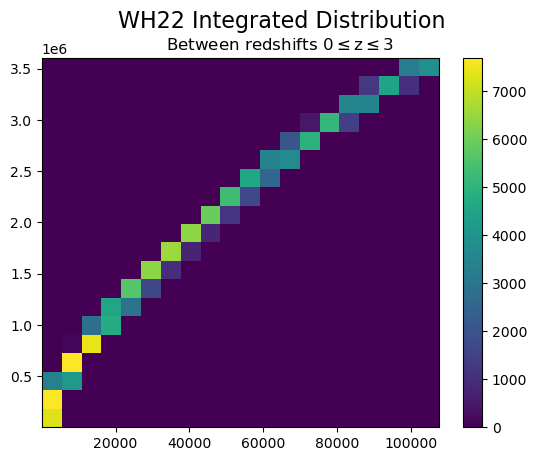

In [7]:
# Another Failed Attempt

# awd_WH22_int = awd_WH22.sort_values(by = "z")
# awd_WH22_int["z_cum"] = np.cumsum(awd_WH22_int["z"], axis = 0)
# awd_WH22_int["rh_cum"] = np.cumsum(awd_WH22_int["rh"], axis = 0)

# fig = plt.hist2d(awd_WH22_int["z_cum"], awd_WH22_int["rh_cum"], bins = (20,20))
# plt.suptitle("WH22 Integrated Distribution", fontsize = 16)
# plt.title("Between redshifts " + str(z_lb) + "$\leq$z$\leq$" + str(z_hb), fontsize = 12, x = 0.6)

# plt.colorbar()
# plt.show()